## Case Walmart: de dados brutos à clusterização de filiais e respectivas estratégias

In [23]:
!pip install scikit-learn
!pip install numpy



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


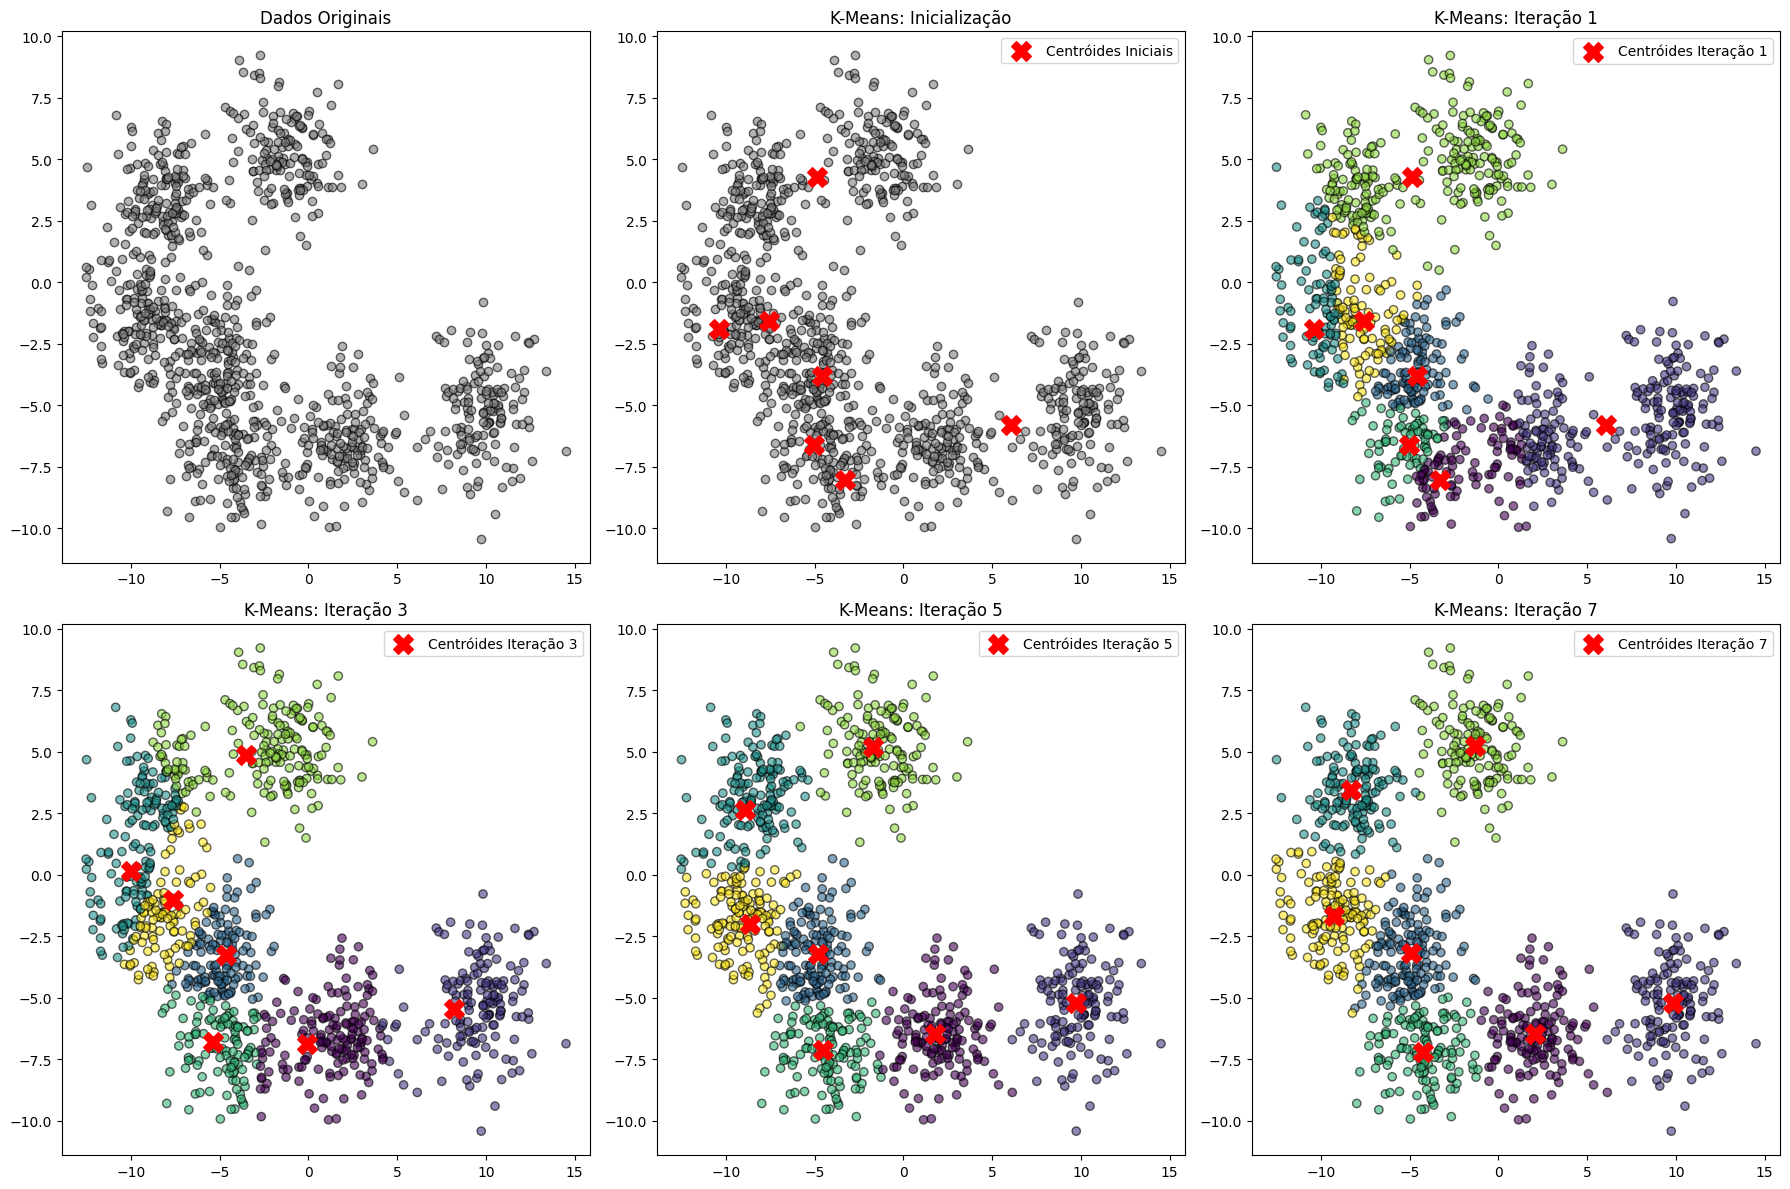

In [24]:
# How does the kmeans works?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Gerando um conjunto de dados sintético com 7 clusters
n_clusters = 7
X, _ = make_blobs(n_samples=1000, centers=n_clusters, cluster_std=1.5, random_state=111)

# Criando o K-Means com inicialização aleatória
kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=1, random_state=111)

# Obtendo os centróides iniciais sem nenhuma iteração (inicialização aleatória)
kmeans.fit(X)
initial_centroids = kmeans.cluster_centers_

# Armazenando as classificações e centróides para as iterações desejadas
labels_iter1, centroids_iter1 = None, None
labels_iter3, centroids_iter3 = None, None
labels_iter5, centroids_iter5 = None, None
labels_iter7, centroids_iter7 = None, None

# Rodando o K-Means e armazenando as iterações desejadas
for i in range(1, 8):
    kmeans.max_iter = i
    kmeans.fit(X)
    
    if i == 1:
        labels_iter1, centroids_iter1 = kmeans.labels_, kmeans.cluster_centers_
    elif i == 3:
        labels_iter3, centroids_iter3 = kmeans.labels_, kmeans.cluster_centers_
    elif i == 5:
        labels_iter5, centroids_iter5 = kmeans.labels_, kmeans.cluster_centers_
    elif i == 7:
        labels_iter7, centroids_iter7 = kmeans.labels_, kmeans.cluster_centers_

# Criando os subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Subplot 1: Dados Originais
axes[0].scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', alpha=0.6)
axes[0].set_title("Dados Originais")

# Subplot 2: Inicialização dos Centróides
axes[1].scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', alpha=0.6)
axes[1].scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='X', s=200, label="Centróides Iniciais")
axes[1].set_title("K-Means: Inicialização")
axes[1].legend()

# Subplot 3: Iteração 1
axes[2].scatter(X[:, 0], X[:, 1], c=labels_iter1, cmap='viridis', edgecolors='k', alpha=0.6)
axes[2].scatter(centroids_iter1[:, 0], centroids_iter1[:, 1], c='red', marker='X', s=200, label="Centróides Iteração 1")
axes[2].set_title("K-Means: Iteração 1")
axes[2].legend()

# Subplot 4: Iteração 3
axes[3].scatter(X[:, 0], X[:, 1], c=labels_iter3, cmap='viridis', edgecolors='k', alpha=0.6)
axes[3].scatter(centroids_iter3[:, 0], centroids_iter3[:, 1], c='red', marker='X', s=200, label="Centróides Iteração 3")
axes[3].set_title("K-Means: Iteração 3")
axes[3].legend()

# Subplot 5: Iteração 5
axes[4].scatter(X[:, 0], X[:, 1], c=labels_iter5, cmap='viridis', edgecolors='k', alpha=0.6)
axes[4].scatter(centroids_iter5[:, 0], centroids_iter5[:, 1], c='red', marker='X', s=200, label="Centróides Iteração 5")
axes[4].set_title("K-Means: Iteração 5")
axes[4].legend()

# Subplot 6: Iteração 7
axes[5].scatter(X[:, 0], X[:, 1], c=labels_iter7, cmap='viridis', edgecolors='k', alpha=0.6)
axes[5].scatter(centroids_iter7[:, 0], centroids_iter7[:, 1], c='red', marker='X', s=200, label="Centróides Iteração 7")
axes[5].set_title("K-Means: Iteração 7")
axes[5].legend()

plt.tight_layout()
plt.show()


### Data Exploration

In [25]:
#✅ Importar sa as bibliotecas de uso comum para o projeto
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do Excel
df = pd.read_csv("walmart_clean_data.csv")

# Verificar o nome das colunas
print(df.columns)


Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'Ano'],
      dtype='object')


In [26]:

# Remover espaços extras nos nomes das coluna e deixar todas com letras minúsculas
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower() 


In [27]:
# Verificar o nome das colunas
print(df.columns)

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano'],
      dtype='object')


In [28]:
df.head()

invoice_id   branch         city                category  unit_price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   quantity      date      time payment_method  rating  profit_margin   total  \
0       7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  522.83   
1       5.0  08/03/19  10:29:00           Cash     9.6           0.48   76.40   
2       7.0  03/03/19  13:23:00    Credit card     7.4           0.33  324.31   
3       8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  465.76   
4       7.0  08/02/19  10:37:00        Ewallet     5.3           0.48  604.17   

    ano  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [29]:

# Criando um DataFrame com datas como string
dataX = {"date": ["2024-01-01", "2024-02-15", "2024-03-10"]}
df_teste = pd.DataFrame(dataX)

# Verificando o tipo antes da conversão
print(df_teste.dtypes)

date    object
dtype: object


In [30]:
df_teste["date"] = pd.to_datetime(df_teste["date"])
print(df_teste.dtypes)

date    datetime64[ns]
dtype: object


In [31]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)

In [32]:
# converter date para datetime
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)

# Criar novas colunas temporais a partir da coluna "date"
df["day_of_week"] = df["date"].dt.day_of_week  # Segunda = 0, Domingo = 6
df["month"] = df["date"].dt.month # Mês do ano (1 a 12)

# Converter coluna "time" para extrair a hora
print(df["time"].head())
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S", errors="coerce").dt.hour # Apenas a hora (0 a 23)

# Criar uma categoria para o período do dia
df["period_of_day"] = pd.cut(df["time"],
                             bins=[0, 6, 12, 18, 24],
                             labels=["Madrugada", "Manhã", "Tarde", "Noite"],
                             right=False)


print(df.columns)


0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: time, dtype: object
Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day'],
      dtype='object')


In [33]:
df['total_profit'] = df['quantity'] * df['profit_margin'] * df['unit_price']

df.describe()


invoice_id   unit_price     quantity                           date  \
count   9969.000000  9969.000000  9969.000000                           9969   
mean    5010.116561    50.622142     2.355602  2021-12-01 16:46:56.731868672   
min        1.000000    10.080000     1.000000            2019-01-01 00:00:00   
25%     2524.000000    32.000000     1.000000            2020-11-25 00:00:00   
50%     5016.000000    51.000000     2.000000            2021-12-05 00:00:00   
75%     7508.000000    69.000000     3.000000            2022-12-18 00:00:00   
max    10000.000000    99.960000    10.000000            2023-12-31 00:00:00   
std     2886.217349    21.203766     1.605455                            NaN   

              time       rating  profit_margin        total          ano  \
count  9969.000000  9969.000000    9969.000000  9969.000000  9969.000000   
mean     15.114856     5.828839       0.393744   121.348819  2021.247868   
min       6.000000     3.000000       0.180000    10.170000  2019.000000   
25%      12.000000     4.000000       0.330000    54.000000  2020.000000   
50%      16.000000     6.000000       0.330000    88.000000  2021.000000   
75%      18.000000     7.000000       0.480000   156.000000  2022.000000   
max      23.000000    10.000000       0.570000   993.000000  2023.000000   
std       4.027089     1.763723       0.090659   112.678040     1.295694   

       day_of_week        month  total_profit  
count  9969.000000  9969.000000   9969.000000  
mean      3.015949     8.570669     47.762005  
min       0.000000     1.000000      2.700000  
25%       1.000000     6.000000     20.460000  
50%       3.000000    10.000000     34.650000  
75%       5.000000    12.000000     60.480000  
max       6.000000    12.000000    507.716100  
std       1.980403     3.725219     47.179160

In [34]:
df.head()

invoice_id   branch         city                category  unit_price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   quantity       date  time payment_method  rating  profit_margin   total  \
0       7.0 2019-01-05    13        Ewallet     9.1           0.48  522.83   
1       5.0 2019-03-08    10           Cash     9.6           0.48   76.40   
2       7.0 2019-03-03    13    Credit card     7.4           0.33  324.31   
3       8.0 2019-01-27    20        Ewallet     8.4           0.33  465.76   
4       7.0 2019-02-08    10        Ewallet     5.3           0.48  604.17   

    ano  day_of_week  month period_of_day  total_profit  
0  2019            5      1         Tarde      250.9584  
1  2019            4      3         Manhã       36.6720  
2  2019            6      3         Tarde      107.0223  
3  2019            6      1         Noite      153.7008  
4  2019            4      2         Manhã      290.0016

In [35]:
import pandas as pd

# Criando colunas de ano e mês
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Criando um DataFrame com todos os anos e meses possíveis
all_years = df["year"].unique()
all_months = list(range(1, 13))

# Verificando os meses ausentes para cada ano
missing_months = {}
for year in all_years:
    existing_months = df[df["year"] == year]["month"].unique()
    missing = sorted(set(all_months) - set(existing_months))
    if missing:
        missing_months[year] = missing

# Exibir os meses ausentes (ou uma mensagem caso todos os meses estejam presentes)
if missing_months:
    print("Meses ausentes por ano:")
    for year, months in missing_months.items():
        print(f"Ano {year}: {months} (Sem vendas)")
else:
    print("Todos os meses possuem vendas para todos os anos.")


Meses ausentes por ano:
Ano 2019: [4, 5, 6, 7, 8, 9, 10, 11, 12] (Sem vendas)


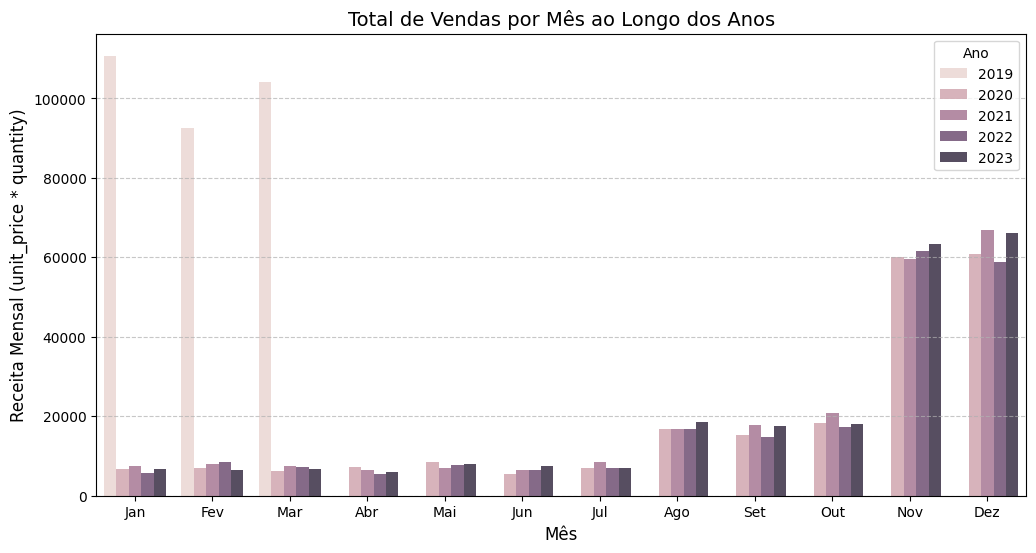

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Criando um DataFrame com todos os meses para todos os anos presentes no dataset
# all_months = pd.MultiIndex.from_product([df["month"].unique(), df["year"].unique()], names=["month", "year"])
year_monthly_sales = df.groupby(["month", "year"]).agg(total = ('total', 'sum')).reset_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="total", hue="year", data=year_monthly_sales, alpha=0.8, dodge=True)

# Configurações do gráfico
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Receita Mensal (unit_price * quantity)", fontsize=12)
plt.title("Total de Vendas por Mês ao Longo dos Anos", fontsize=14)
plt.xticks(ticks=range(0, 12), labels=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Ano")

# Exibir gráfico
plt.show()


In [37]:
# 2019 só tinha dados de janeiro à março

df = df.drop(df[df["year"] == 2019].index)

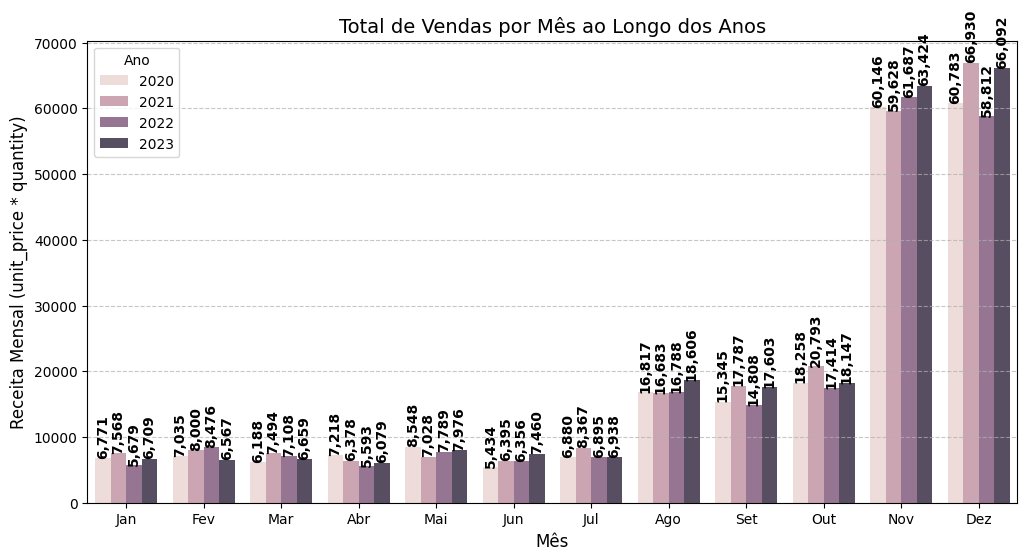

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame com a soma da receita mensal por mês e ano
year_monthly_sales = df.groupby(["month", "year"]).agg(total=('total', 'sum')).reset_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="month", y="total", hue="year", data=year_monthly_sales, alpha=0.8, dodge=True)

# Configurações do gráfico
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Receita Mensal (unit_price * quantity)", fontsize=12)
plt.title("Total de Vendas por Mês ao Longo dos Anos", fontsize=14)
plt.xticks(ticks=range(0, 12), labels=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Ano")

# Adicionando rótulos com os valores das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Apenas exibe rótulos se houver valor positivo
        ax.annotate(f'{height:,.0f}',  # Formata como número inteiro com separador de milhar
                    (p.get_x() + p.get_width() / 2., height),  # Posição do rótulo
                    ha='center', va='bottom',  # Alinhamento
                    fontsize=10, color='black', fontweight='bold',
                    rotation=90)

# Exibir gráfico
plt.show()


In [39]:
year_monthly_sales.head(20)

month  year   total
0       1  2020  6771.0
1       1  2021  7568.0
2       1  2022  5679.0
3       1  2023  6709.0
4       2  2020  7035.0
5       2  2021  8000.0
6       2  2022  8476.0
7       2  2023  6567.0
8       3  2020  6188.0
9       3  2021  7494.0
10      3  2022  7108.0
11      3  2023  6659.0
12      4  2020  7218.0
13      4  2021  6378.0
14      4  2022  5593.0
15      4  2023  6079.0
16      5  2020  8548.0
17      5  2021  7028.0
18      5  2022  7789.0
19      5  2023  7976.0

C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_18740\2063332624.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ay = sns.barplot(x="month", y="total", data=monthly_sales, palette="Blues_r", alpha=0.6)


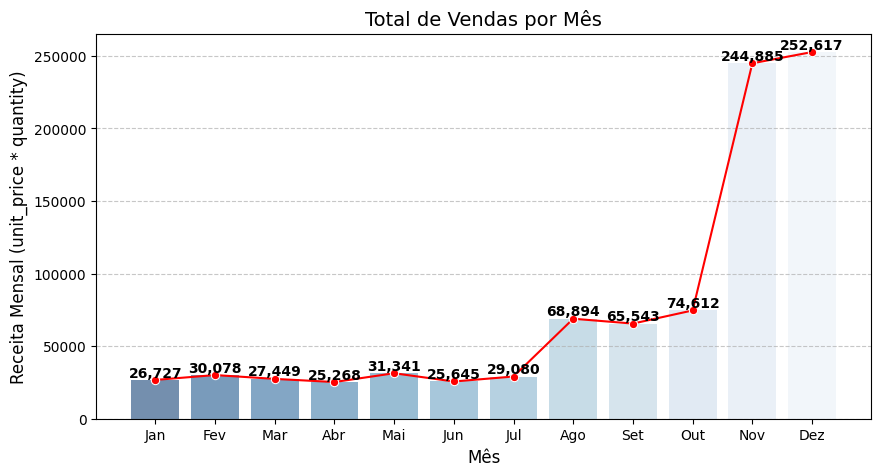

In [40]:

#✅ GRÁFICOS DE ANÁLISE MÊS A MÊS VERSÃO GRÁFICO COLUNA
# 📊 ANÁLISE POR MÊS
monthly_sales = df.groupby("month")["total"].sum().reset_index()

plt.figure(figsize=(10, 5))
ay = sns.barplot(x="month", y="total", data=monthly_sales, palette="Blues_r", alpha=0.6)
sns.lineplot(x=monthly_sales["month"] - 1, y="total", data=monthly_sales, marker="o", color="red") #foi colocado esse -1 pois o sns.lineplot pode interpretar os valores como contínuos, deslocando a linha à direita.
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Receita Mensal (unit_price * quantity)", fontsize=12)
plt.title("Total de Vendas por Mês", fontsize=14)
plt.xticks(range(0, 12), ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
for p in ay.patches:
    height = p.get_height()
    if height > 0:  # Apenas exibe rótulos se houver valor positivo
        ay.annotate(f'{height:,.0f}',  # Formata como número inteiro com separador de milhar
                    (p.get_x() + p.get_width() / 2., height),  # Posição do rótulo
                    ha='center', va='bottom',  # Alinhamento
                    fontsize=10, color='black', fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Adicionando rótulos com os valores das barras
plt.show()


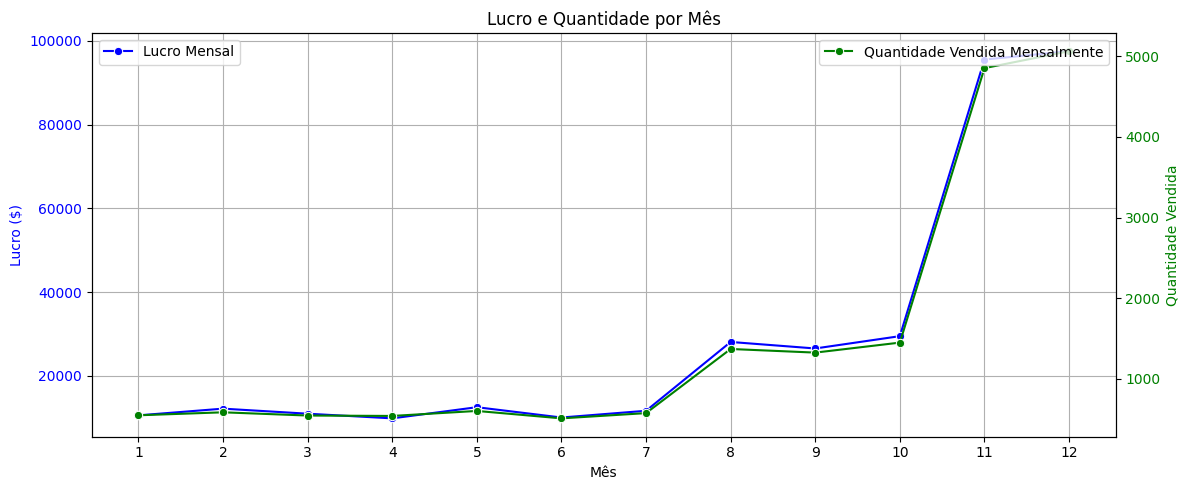

In [41]:
# ✅ Agrupar por mês e calcular soma/média do lucro e soma da quantidade
profit_by_month = df.groupby("month").agg({
    "total_profit": "sum",  # Soma do lucro
    "quantity": "sum"  # Soma da quantidade vendida
}).reset_index()

# Renomear colunas
profit_by_month.columns = ["month", "profit_sum", "quantity_sum"]

# 📊 Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(12, 5))

# 🚀 Primeira escala Y (Lucro)
ax1.set_xlabel("Mês")
ax1.set_ylabel("Lucro ($)", color="blue")
sns.lineplot(x="month", y="profit_sum", data=profit_by_month, marker="o", label="Lucro Mensal", color="blue", ax=ax1)
ax1.tick_params(axis="y", labelcolor="blue")

# 🎯 Criar segundo eixo Y (Quantidade vendida)
ax2 = ax1.twinx()
ax2.set_ylabel("Quantidade Vendida", color="green")
sns.lineplot(x="month", y="quantity_sum", data=profit_by_month, marker="o", label="Quantidade Vendida Mensalmente", color="green", ax=ax2)
ax2.tick_params(axis="y", labelcolor="green")

# 🎨 Configurações
plt.xticks(range(1, 13))
plt.title("Lucro e Quantidade por Mês")
ax1.grid()
fig.tight_layout()

# 📌 Adicionar legendas manualmente
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [42]:
# ✅OUTPUT MÊS COM MAIOR RECEITA E MÊS COM MENOR RECEITA
# 📊 ANÁLISE POR MÊS
max_month_index = monthly_sales["total"].idxmax()
min_month_index = monthly_sales["total"].idxmin()

# 🔹 Mapeamento de números para nomes dos meses
month_mapping = {
    1: "Janeiro",
    2: "Fevereiro",
    3: "Março",
    4: "Abril",
    5: "Maio",
    6: "Junho",
    7: "Julho",
    8: "Agosto",
    9: "Setembro",
    10: "Outubro",
    11: "Novembro",
    12: "Dezembro"
}


# ✅
# Obtém os dois meses com maior e menor receita
top_4_months = monthly_sales.nlargest(4, "total")
bottom_4_months = monthly_sales.nsmallest(4, "total")

# Exibe os dois meses com maior receita
print("🔹 Meses com MAIOR receita:")
for i, (_, row) in enumerate(top_4_months.iterrows(), start=1):
    month_name = month_mapping[row["month"]]
    print(f"   {i}. {month_name}: ${row['total']:.2f}")

# Exibe os dois meses com menor receita
print("\n🔻 Meses com MENOR receita:")
for i, (_, row) in enumerate(bottom_4_months.iterrows(), start=1):
    month_name = month_mapping[row["month"]]
    month_index = month_mapping[row["month"]].index
    print(f"   {i}. {month_name}: ${row['total']:.2f}")



🔹 Meses com MAIOR receita:
   1. Dezembro: $252617.00
   2. Novembro: $244885.00
   3. Outubro: $74612.00
   4. Agosto: $68894.00

🔻 Meses com MENOR receita:
   1. Abril: $25268.00
   2. Junho: $25645.00
   3. Janeiro: $26727.00
   4. Março: $27449.00


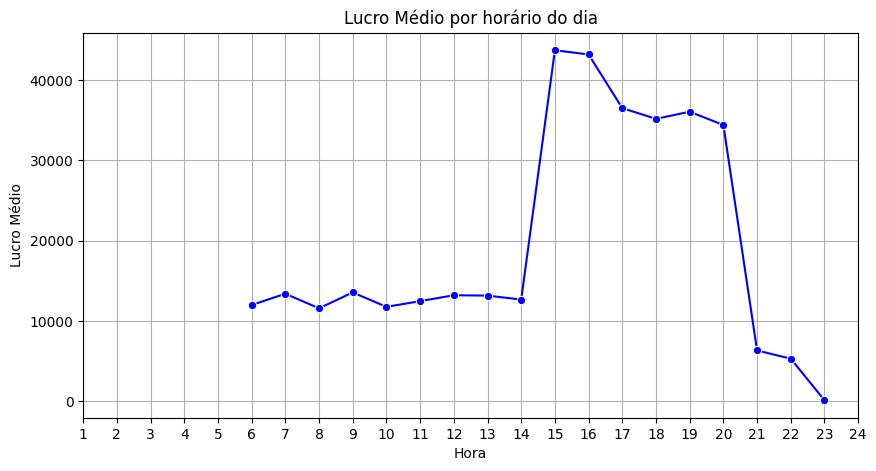

In [43]:
# Agrupar por hora do dia e calcular média do lucro VERSÃO GRÁFICO LINHA
profit_by_hour = df.groupby("time")["total_profit"].sum().reset_index()

# 📊 Gráfico de lucro ao longo do dia
plt.figure(figsize=(10, 5))
sns.lineplot(x="time", y="total_profit", data=profit_by_hour, marker="o", color="blue")
plt.xticks(range(1, 25))  # Definir períodos do dia no eixo X
plt.title("Lucro Médio por horário do dia")
plt.xlabel("Hora")
plt.ylabel("Lucro Médio")
plt.grid()
plt.show()

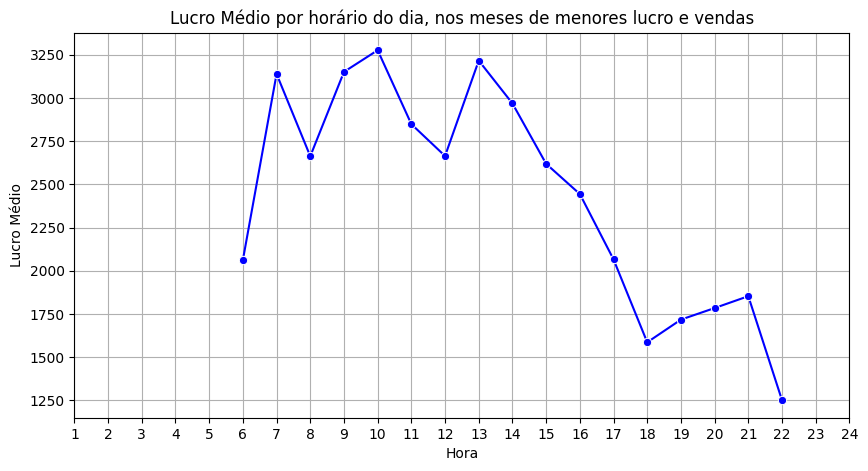

In [44]:

#✅
# Agrupar por hora do dia e calcular média do lucro VERSÃO GRÁFICO LINHA

df_filtered_min_months = df[df["month"].isin([1, 3, 4, 6])]
profit_by_hour_min_months = df_filtered_min_months.groupby("time")["total_profit"].sum().reset_index()

# 📊 Gráfico de lucro ao longo do dia
plt.figure(figsize=(10, 5))
sns.lineplot(x="time", y="total_profit", data=profit_by_hour_min_months, marker="o", color="blue")
plt.xticks(range(1, 25))  # Definir horários do dia no eixo X
plt.title("Lucro Médio por horário do dia, nos meses de menores lucro e vendas")
plt.xlabel("Hora")
plt.ylabel("Lucro Médio")
plt.grid()
plt.show()


C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_18740\2250137769.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_period_of_day = df.groupby("period_of_day")["total_profit"].sum().reset_index()


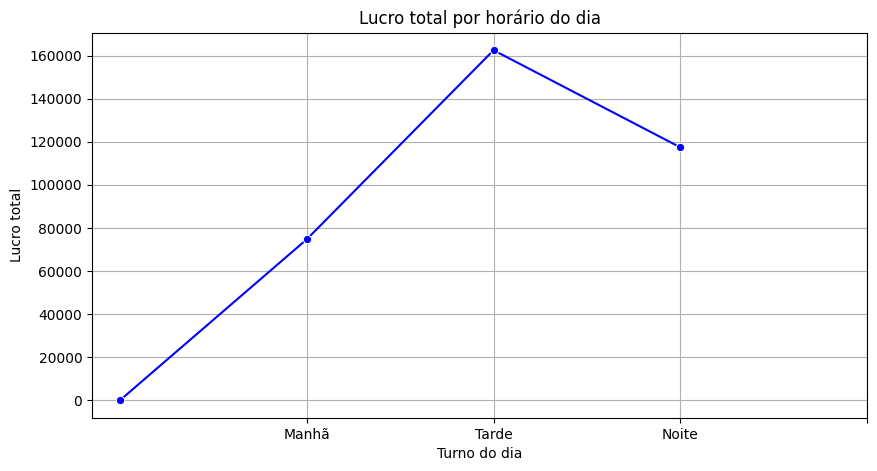

In [45]:

#✅
# Agrupar por período do dia e calcular lucro total VERSÃO GRÁFICO LINHA
profit_by_period_of_day = df.groupby("period_of_day")["total_profit"].sum().reset_index()

# 📊 Gráfico de lucro ao longo do período do dia
plt.figure(figsize=(10, 5))
sns.lineplot(x="period_of_day", y="total_profit", data=profit_by_period_of_day, marker="o", color="blue")
plt.xticks(range(1, 5))  # Definir períodos do dia no eixo X
plt.title("Lucro total por horário do dia")
plt.xlabel("Turno do dia")
plt.ylabel("Lucro total")
plt.grid()
plt.show()



C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_18740\2469630962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="total", data=weekday_sales, palette="Greens_r")


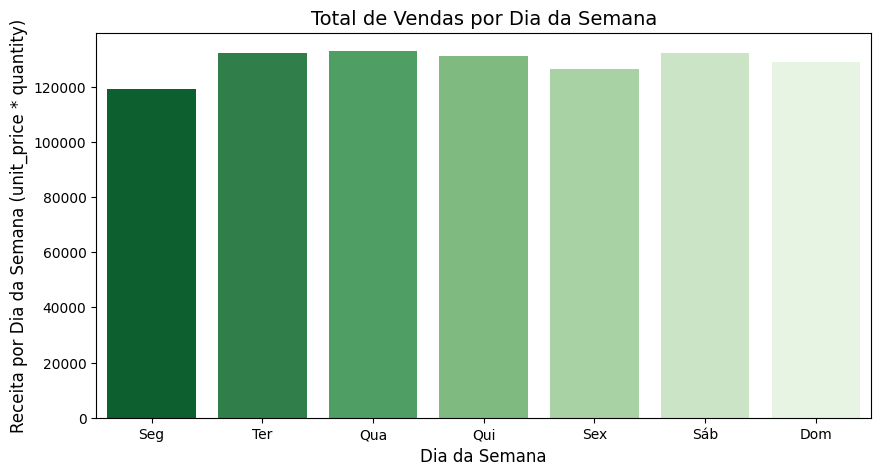

In [46]:
#✅ GRÁFICOS DE ANÁLISE POR DIA DA SEMANA VERSÃO GRÁFICO COLUNA
# 📊 ANÁLISE POR DIA DA SEMANA
weekday_sales = df.groupby("day_of_week")["total"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="day_of_week", y="total", data=weekday_sales, palette="Greens_r")
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Receita por Dia da Semana (unit_price * quantity)", fontsize=12)
plt.title("Total de Vendas por Dia da Semana", fontsize=14)
plt.xticks(range(0, 7), ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"])
plt.show()



In [47]:
# ✅
# 📊 ANÁLISE POR DIA DA SEMANA GERAL
max_day_index = weekday_sales["total"].idxmax()
min_day_index = weekday_sales["total"].idxmin()

# 🔹 Mapeamento de números para nomes dos dias da semana
day_mapping = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}

# Obtém o número do dia da semana
max_day_number = weekday_sales.loc[max_day_index, "day_of_week"]
min_day_number = weekday_sales.loc[min_day_index, "day_of_week"]

# Mapeia para o nome do dia da semana
max_day_name = day_mapping[max_day_number]
min_day_name = day_mapping[min_day_number]

# Exibe os resultados
print(f"🔹 Dia da semana com MAIOR receita: {max_day_name} (${weekday_sales.loc[max_day_index, 'total']})")
print(f"🔻 Dia da semana com MENOR receita: {min_day_name} (${weekday_sales.loc[min_day_index, 'total']})")

# Substituir os números pelos nomes dos dias da semana
# weekday_sales["day_of_week"] = weekday_sales["day_of_week"].map(day_mapping)




#plt.figure(figsize=(10, 5))
#sns.barplot(x="day_of_week", y="total", data=weekday_sales, palette="Greens_r")
#plt.xlabel("Dia da Semana", fontsize=12)
#plt.ylabel("Receita do dia", fontsize=12)
#plt.title("Total de Receita por Dia da Semana", fontsize=14)
#plt.xticks(range(0, 7), ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"])
#plt.show()

#print(f"🔹 Dia com MAIOR receita: {max_day['day_of_week']} (${max_day['total']})")
#print(f"🔻 Dia com MENOR receita: {min_day['day_of_week']} (${min_day['total']})")



🔹 Dia da semana com MAIOR receita: Quarta-feira ($132867.0)
🔻 Dia da semana com MENOR receita: Segunda-feira ($119002.0)


In [48]:
# ✅ RANKEAMENTO DE RECEITA DOS DIAS DA SEMANA NOS DOIS MESES DE MAIOR RECEITA

# 🔹 Passo 2: Selecionar os 4 meses com menor volume de vendas
bottom_4 = monthly_sales.nsmallest(4, "total")
# 🔹 Passo 3: Transformar em lista antes de sobrescrever a variável
bottom_4_months = bottom_4["month"].tolist()


# 🔹 Passo 2: Filtrar os dados apenas para esses meses
filtered_df = df[df["month"].isin(bottom_4_months)]

# 🔹 Passo 3: Agrupar por dia da semana e calcular as vendas
weekday_sales = filtered_df.groupby("day_of_week")["total"].sum().reset_index()

# 🔹 Passo 4: Ordenar e encontrar os dias com mais vendas
best_selling_days_worst_months = weekday_sales.sort_values(by="total", ascending=False)

# 🔹 Mapeamento de números para nomes dos dias da semana
day_mapping = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}

# Substituir os números pelos nomes dos dias da semana
weekday_sales["day_of_week"] = weekday_sales["day_of_week"].map(day_mapping)

# 🔹 Passo 4: Ordenar e encontrar os dias com mais vendas
best_selling_days_worst_months = weekday_sales.sort_values(by="total", ascending=False)

# Exibir os dias da semana ordenados pelo volume de vendas
print("🔹 Dias da semana que geraram maior receita nos quatro meses com menor receita:")
print(best_selling_days_worst_months)   




🔹 Dias da semana que geraram maior receita nos quatro meses com menor receita:
     day_of_week    total
1    Terça-feira  16648.0
2   Quarta-feira  16430.0
3   Quinta-feira  14935.0
6        Domingo  14929.0
5         Sábado  14879.0
4    Sexta-feira  14353.0
0  Segunda-feira  12915.0


In [49]:
# ✅ Colunas atuais
print(df.columns)


Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day', 'total_profit', 'year'],
      dtype='object')


In [50]:
df.head()

invoice_id   branch         city             category  unit_price  \
1000        1001  WALM012      Garland   Home and lifestyle        55.0   
1001        1002  WALM013       Irving  Fashion accessories        53.0   
1002        1003  WALM090    Brownwood   Home and lifestyle        66.0   
1003        1004  WALM031   Lewisville  Fashion accessories        36.0   
1004        1005  WALM003  San Antonio   Home and lifestyle        50.0   

      quantity       date  time payment_method  rating  profit_margin  total  \
1000       2.0 2022-10-09    15        Ewallet     6.0           0.48  110.0   
1001       2.0 2020-04-06    10        Ewallet     8.0           0.48  106.0   
1002       2.0 2020-08-04    13        Ewallet     7.0           0.33  132.0   
1003       1.0 2022-10-18    19        Ewallet     7.0           0.48   36.0   
1004       3.0 2023-10-30    19        Ewallet     7.0           0.36  150.0   

       ano  day_of_week  month period_of_day  total_profit  year  
1000  2022            6     10         Tarde         52.80  2022  
1001  2020            0      4         Manhã         50.88  2020  
1002  2020            1      8         Tarde         43.56  2020  
1003  2022            1     10         Noite         17.28  2022  
1004  2023            0     10         Noite         54.00  2023

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8969 entries, 1000 to 9968
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      8969 non-null   int64         
 1   branch          8969 non-null   object        
 2   city            8969 non-null   object        
 3   category        8969 non-null   object        
 4   unit_price      8969 non-null   float64       
 5   quantity        8969 non-null   float64       
 6   date            8969 non-null   datetime64[ns]
 7   time            8969 non-null   int32         
 8   payment_method  8969 non-null   object        
 9   rating          8969 non-null   float64       
 10  profit_margin   8969 non-null   float64       
 11  total           8969 non-null   float64       
 12  ano             8969 non-null   int64         
 13  day_of_week     8969 non-null   int32         
 14  month           8969 non-null   int32         
 15  p

In [52]:
aggregated_df = df.groupby(by="branch", as_index=False) \
    .agg(
        monetary_value=("total_profit", "sum"),
        frequency=("invoice_id", "nunique"),
        last_invoice_date=("date", "max")
    )

aggregated_df.head(10)

branch  monetary_value  frequency last_invoice_date
0  WALM001         2359.44         64        2023-12-24
1  WALM002         2006.28         55        2023-12-23
2  WALM003         8472.00        170        2023-12-27
3  WALM004         2726.40         53        2023-12-29
4  WALM005         3396.96         71        2023-11-20
5  WALM006         3142.08         66        2023-12-29
6  WALM007         2997.60         59        2023-12-26
7  WALM008         3279.84         61        2023-12-31
8  WALM009        10692.00        224        2023-12-31
9  WALM010         2874.24         58        2023-12-02

In [53]:
max_invoice_date = aggregated_df["last_invoice_date"].max()
max_invoice_date

aggregated_df["recency"] = (max_invoice_date - aggregated_df["last_invoice_date"]).dt.days

aggregated_df.head(5)


branch  monetary_value  frequency last_invoice_date  recency
0  WALM001         2359.44         64        2023-12-24        7
1  WALM002         2006.28         55        2023-12-23        8
2  WALM003         8472.00        170        2023-12-27        4
3  WALM004         2726.40         53        2023-12-29        2
4  WALM005         3396.96         71        2023-11-20       41

In [54]:
aggregated_df["recency"].min()

np.int64(0)

In [55]:
# Definindo as colunas a serem transformadas
cols_to_transform = ["monetary_value", "frequency", "recency"]

# Verificando onde há valores zero nas colunas de interesse
zero_counts = (aggregated_df[cols_to_transform] == 0).sum()


In [56]:

# Exibindo os resultados
print("Contagem de valores zero em cada coluna:\n", zero_counts)

# Exibir as linhas que possuem pelo menos um valor zero
rows_with_zeros = aggregated_df[aggregated_df[cols_to_transform].eq(0).any(axis=1)]
print("\nLinhas que contêm pelo menos um valor zero:\n", rows_with_zeros)


Contagem de valores zero em cada coluna:
 monetary_value     0
frequency          0
recency           14
dtype: int64

Linhas que contêm pelo menos um valor zero:
      branch  monetary_value  frequency last_invoice_date  recency
7   WALM008         3279.84         61        2023-12-31        0
8   WALM009        10692.00        224        2023-12-31        0
23  WALM024         2979.36         60        2023-12-31        0
30  WALM031         1800.00         47        2023-12-31        0
45  WALM046         8876.64        180        2023-12-31        0
50  WALM051         3095.70         59        2023-12-31        0
64  WALM065         5754.21        168        2023-12-31        0
65  WALM066         2366.43         61        2023-12-31        0
67  WALM068         1846.02         52        2023-12-31        0
68  WALM069         6499.68        206        2023-12-31        0
74  WALM075         5912.94        172        2023-12-31        0
85  WALM086         5285.28        168      

In [57]:
max_invoice_date = aggregated_df["last_invoice_date"].max() + pd.Timedelta(days=1)

max_invoice_date


Timestamp('2024-01-01 00:00:00')

In [58]:

aggregated_df["recency"] = (max_invoice_date - aggregated_df["last_invoice_date"]).dt.days

# Definindo as colunas a serem transformadas após atualizaçao da recency
cols_to_transform = ["monetary_value", "frequency", "recency"]

# Verificando novamente onde há valores zero nas colunas de interesse
zero_counts = (aggregated_df[cols_to_transform] == 0).sum()

# Exibindo os resultados atualizados
print("Contagem de valores zero em cada coluna:\n", zero_counts)

# Exibir as linhas que possuem pelo menos um valor zero
rows_with_zeros = aggregated_df[aggregated_df[cols_to_transform].eq(0).any(axis=1)]
print("\nLinhas que contêm pelo menos um valor zero:\n", rows_with_zeros)



Contagem de valores zero em cada coluna:
 monetary_value    0
frequency         0
recency           0
dtype: int64

Linhas que contêm pelo menos um valor zero:
 Empty DataFrame
Columns: [branch, monetary_value, frequency, last_invoice_date, recency]
Index: []


In [59]:
# Isso foi de extrema importância para mais tarde aplicarmos o box-cox, pois os valores precisam ser positivos não nulos.

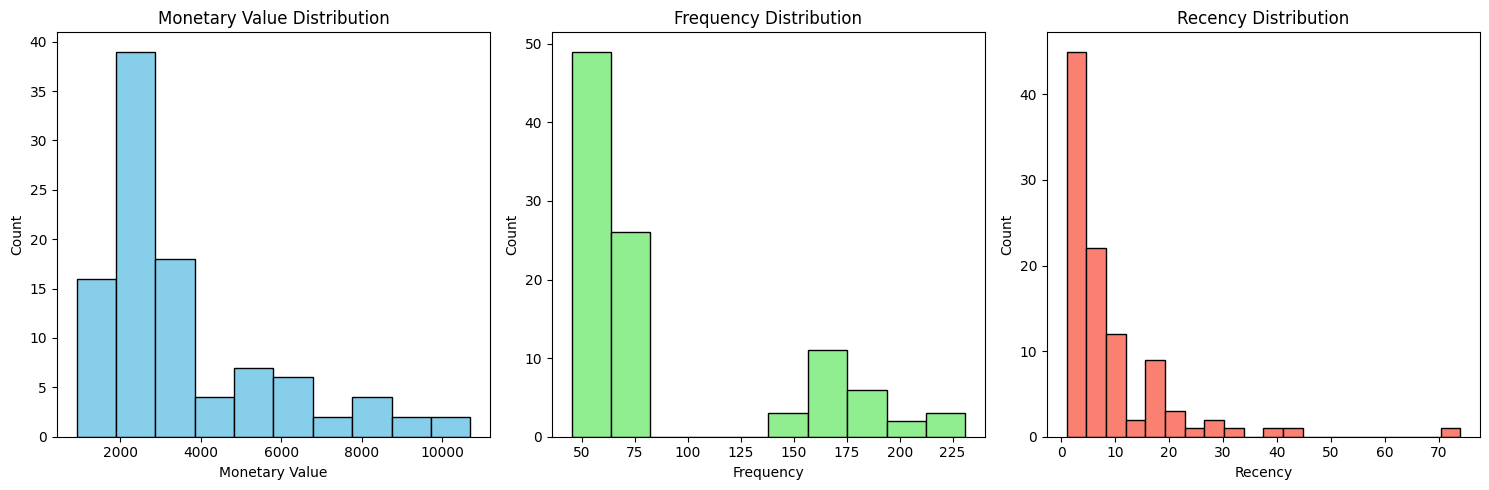

In [60]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['monetary_value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['recency'], bins=20, color="salmon", edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

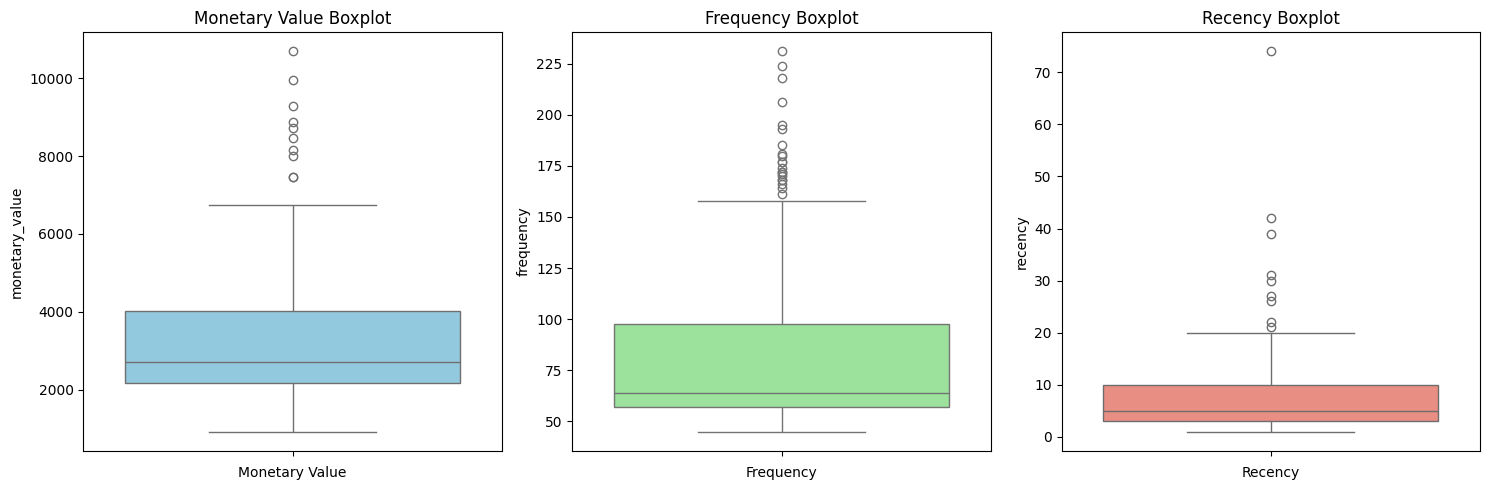

In [61]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')


plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')


plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [62]:
# Esses outliers não serão descartados, pois representam ótimos clientes para a empresa, com exceção dos da recência

In [63]:
M_Q1 = aggregated_df["monetary_value"].quantile(0.25)
M_Q1

np.float64(2181.7125)

In [64]:

M_Q3 = aggregated_df["monetary_value"].quantile(0.75)
M_Q3

np.float64(4015.0649999999996)

In [65]:
#Inter Quantile Range
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df['monetary_value'] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["monetary_value"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()


monetary_value   frequency    last_invoice_date    recency
count       10.000000   10.000000                   10  10.000000
mean      8710.278000  186.600000  2023-12-28 16:48:00   3.300000
min       7460.640000  147.000000  2023-12-25 00:00:00   1.000000
25%       8039.520000  167.000000  2023-12-27 06:00:00   2.000000
50%       8599.440000  180.500000  2023-12-29 12:00:00   2.500000
75%       9185.160000  209.750000  2023-12-30 00:00:00   4.750000
max      10692.000000  231.000000  2023-12-31 00:00:00   7.000000
std       1045.163852   28.308617                  NaN   2.110819

In [66]:
F_Q1 = aggregated_df["frequency"].quantile(0.25)
F_Q1


F_Q3 = aggregated_df["frequency"].quantile(0.75)
F_Q3

#Inter Quantile Range
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()


monetary_value   frequency              last_invoice_date    recency
count       21.000000   21.000000                             21  21.000000
mean      7076.368571  183.476190  2023-12-28 21:42:51.428571392   3.095238
min       4085.250000  161.000000            2023-12-22 00:00:00   1.000000
25%       5775.990000  170.000000            2023-12-28 00:00:00   1.000000
50%       6499.680000  177.000000            2023-12-30 00:00:00   2.000000
75%       8472.000000  193.000000            2023-12-31 00:00:00   4.000000
max      10692.000000  231.000000            2023-12-31 00:00:00  10.000000
std       1776.482341   20.355881                            NaN   2.467889

In [67]:
R_Q1 = aggregated_df["recency"].quantile(0.25)
R_Q1


R_Q3 = aggregated_df["recency"].quantile(0.75)
R_Q3

#Inter Quantile Range
R_IQR = R_Q3 - R_Q1

recency_outliers_df = aggregated_df[(aggregated_df['recency'] > (R_Q3 + 1.5 * R_IQR)) | (aggregated_df["recency"] < (R_Q1 - 1.5 * R_IQR))].copy()

recency_outliers_df.describe()

monetary_value  frequency    last_invoice_date    recency
count        9.000000   9.000000                    9   9.000000
mean      2712.810000  57.777778  2023-11-27 08:00:00  34.666667
min       1175.130000  46.000000  2023-10-19 00:00:00  21.000000
25%       2400.480000  50.000000  2023-11-23 00:00:00  26.000000
50%       2874.240000  58.000000  2023-12-02 00:00:00  30.000000
75%       3370.080000  66.000000  2023-12-06 00:00:00  39.000000
max       3396.960000  71.000000  2023-12-11 00:00:00  74.000000
std        717.081337   9.483904                  NaN  16.340135

In [68]:
not_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) & (~aggregated_df.index.isin(recency_outliers_df.index))]

not_outliers_df.describe()

monetary_value   frequency              last_invoice_date    recency
count       69.000000   69.000000                             69  69.000000
mean      2524.155652   64.478261  2023-12-24 19:49:33.913043456   7.173913
min        917.640000   45.000000            2023-12-12 00:00:00   1.000000
25%       2006.280000   56.000000            2023-12-23 00:00:00   3.000000
50%       2366.430000   60.000000            2023-12-27 00:00:00   5.000000
75%       2976.480000   66.000000            2023-12-29 00:00:00   9.000000
max       6360.480000  158.000000            2023-12-31 00:00:00  20.000000
std        886.252826   20.210371                            NaN   5.357668

In [69]:
not_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   branch             69 non-null     object        
 1   monetary_value     69 non-null     float64       
 2   frequency          69 non-null     int64         
 3   last_invoice_date  69 non-null     datetime64[ns]
 4   recency            69 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [70]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   branch             100 non-null    object        
 1   monetary_value     100 non-null    float64       
 2   frequency          100 non-null    int64         
 3   last_invoice_date  100 non-null    datetime64[ns]
 4   recency            100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ KB


In [71]:
not_outliers_df.head(10)

branch  monetary_value  frequency last_invoice_date  recency
0   WALM001         2359.44         64        2023-12-24        8
1   WALM002         2006.28         55        2023-12-23        9
3   WALM004         2726.40         53        2023-12-29        3
5   WALM006         3142.08         66        2023-12-29        3
6   WALM007         2997.60         59        2023-12-26        6
7   WALM008         3279.84         61        2023-12-31        1
10  WALM011         2548.32         58        2023-12-29        3
11  WALM012         3510.72         66        2023-12-22       10
12  WALM013         2064.00         48        2023-12-28        4
13  WALM014         1908.48         45        2023-12-25        7

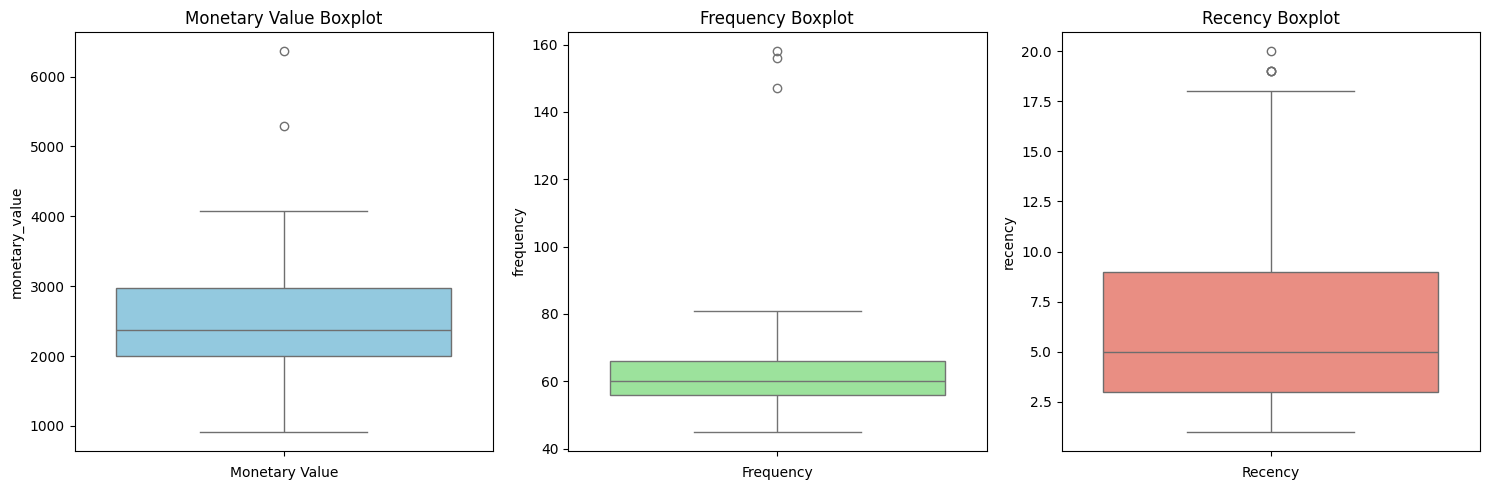

In [72]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=not_outliers_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')


plt.subplot(1, 3, 2)
sns.boxplot(data=not_outliers_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')


plt.subplot(1, 3, 3)
sns.boxplot(data=not_outliers_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D SCATTER PLOT OF CUSTOMER DATA')

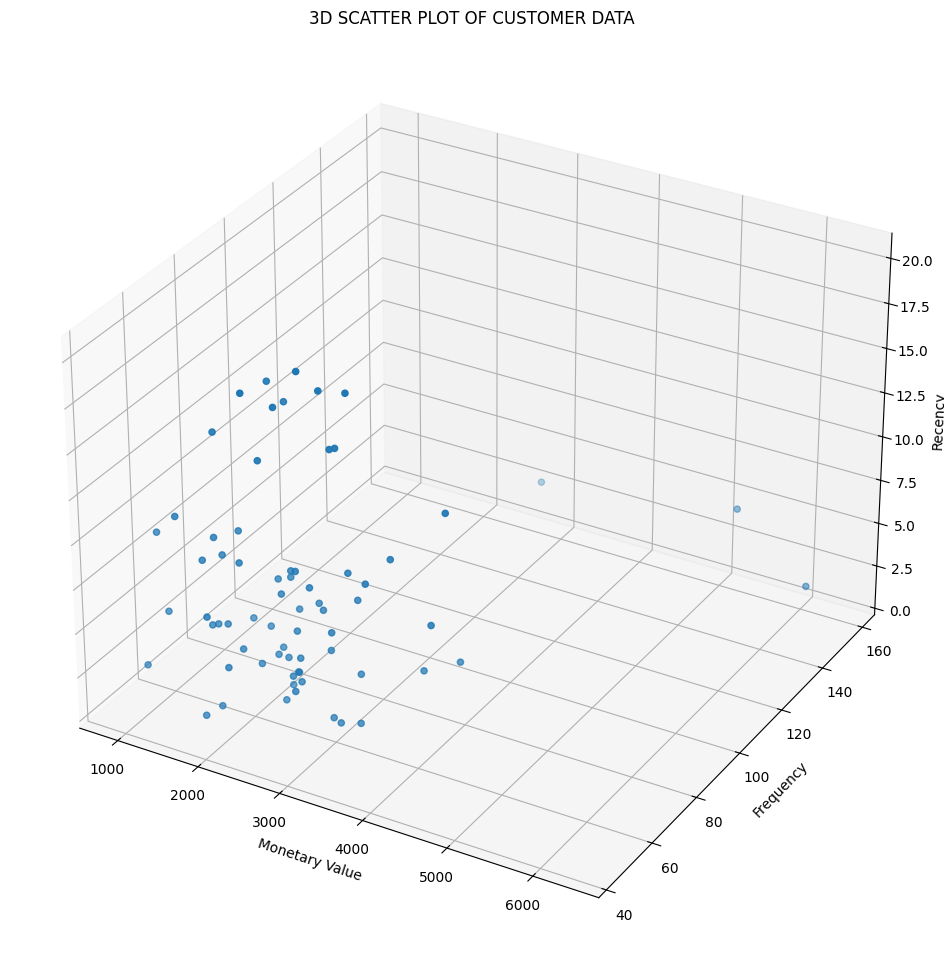

In [73]:
fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(not_outliers_df["monetary_value"], not_outliers_df["frequency"], not_outliers_df["recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D SCATTER PLOT OF CUSTOMER DATA')

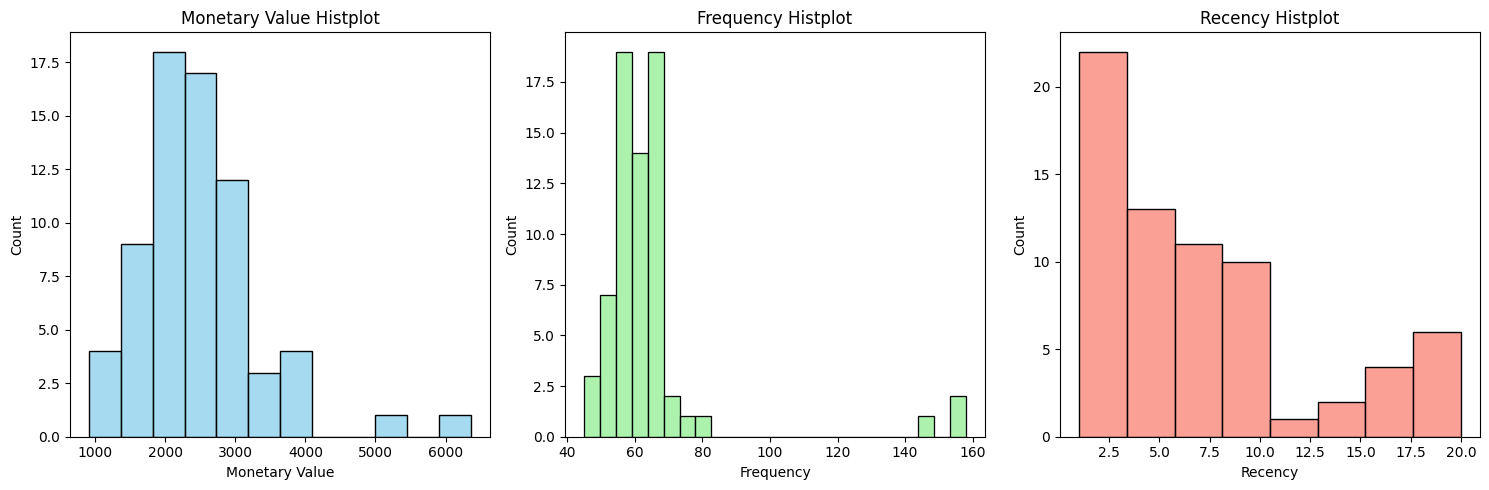

In [74]:
# Let's see if the data follows a normal distribution

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=not_outliers_df['monetary_value'], color='skyblue')
plt.title('Monetary Value Histplot')
plt.xlabel('Monetary Value')


plt.subplot(1, 3, 2)
sns.histplot(data=not_outliers_df['frequency'], color='lightgreen')
plt.title('Frequency Histplot')
plt.xlabel('Frequency')


plt.subplot(1, 3, 3)
sns.histplot(data=not_outliers_df['recency'], color='salmon')
plt.title('Recency Histplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()



In [75]:
# Como os dados têm uma cauda longa, a transformação logarítmica pode ajudar a reduzir a assimetria.
# Se não houver valores zero ou negativos, o Box-Cox pode ser uma ótima alternativa.
# Caso não tivesse sido feita a verificação quanto à existência de valores negativos nas colunas...
# "monetary_value", "frequency" e "recency" antes, agora teríamos que executar o código abaixo e então...
# fazer todas as alterações necessárias nas partes anteriores do código para não haver mais valores nulos no aggregated_df...
# e no not_outliers_df.
# Segue código para verificação:

# Definindo as colunas a serem transformadas
# cols_to_transform = ["monetary_value", "frequency", "recency"]

# Verificando onde há valores zero nas colunas de interesse
# zero_counts = (not_outliers_df[cols_to_transform] == 0).sum()

# Exibindo os resultados
# print("Contagem de valores zero em cada coluna:\n", zero_counts)

# Exibir as linhas que possuem pelo menos um valor zero
# rows_with_zeros = not_outliers_df[not_outliers_df[cols_to_transform].eq(0).any(axis=1)]
# print("\nLinhas que contêm pelo menos um valor zero:\n", rows_with_zeros)

### 📌 Transformação Box-Cox
**Fórmula da Transformação Box-Cox**:

A transformação de Box-Cox é definida como:

$$
\begin{align*}
y' = \begin{cases}
\frac{y^\lambda - 1}{\lambda}, & \text{se } \lambda \neq 0 \\
\ln(y), & \text{se } \lambda = 0
\end{cases}
\end{align*}
$$


Onde:

- \( y' \) → Novo valor transformado.
- \( y \) → Valor original da variável.
- &#955; → Parâmetro de transformação que controla a forma da distribuição.
- \( ln(y) \) → O logaritmo natural de \( y \), aplicado quando \( &#955; = 0 \).

✔️ O `scipy.stats.boxcox` ajusta automaticamente &#955; para encontrar a melhor normalização com base na verossimilhança dos dados, considerando:
- &#955; = 1 → Nenhuma transformação (mantém \( y \) original).
- &#955; = 0  → Transformação logarítmica \( \ln(y) \).
- &#955; = -1  → Transformação recíproca \( 1/y \).
- &#955; > 1  → Expande a escala dos dados.
- &#955; < 0  → Inverte a curvatura da distribuição.

✔️ Os valores de \( y \) devem ser **positivos** (\( y > 0 \)).  

✔️ Ideal para dados com **assimetria positiva** (enviesados à direita).  

---
### 📌 Transformação Logarítmica (com Ajuste)

 **Fórmula da Transformação Logarítmica (com Ajuste)**:

A transformação logarítmica é definida como:

$$
y' = \ln(y + 1)
$$

Onde:

- \( y' \) → Novo valor transformado.
- \( y \) → Valor original da variável "recency".
- \( \ln(y + 1) \) → O logaritmo natural de \( y + 1 \). O uso de \( y + 1 \) (implementado pela função `np.log1p`) é crucial para lidar com valores zero na variável original, evitando erros de logaritmo indefinido.

✔️ Aplicável a dados com **assimetria positiva** (enviesados à direita).

✔️ Lida com **valores zero** na variável original através do ajuste `+ 1`.

✔️ Reduz a **dispersão** dos dados, tornando-os mais adequados para modelos estatísticos e de machine learning que pressupõem normalidade.

✔️ Simplifica a **interpretação** dos dados em alguns contextos, transformando relações exponenciais em relações lineares.
  

In [76]:
# Since our not_outliers_df doesn't follow a normal distribution, we will not use standard scaling
# Box-Cox reduz a assimetria (skewness) e aproxima os dados de uma distribuição normal, tornando-os mais adequados para modelos estatísticos e de Machine Learning.
# MinMaxScaler reescala os valores para um intervalo específico (geralmente [0,1]), o que pode ser útil para algoritmos sensíveis à escala, como redes neurais e K-Means.

from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler


def transformar_dados(not_outliers_df, cols_to_transform=["monetary_value", "frequency", "recency"]):
    df_transformed = not_outliers_df[cols_to_transform].copy()
    
    # Evita erro do Box-Cox substituindo zeros por um valor pequeno
    eps = 1e-6
    df_transformed = df_transformed.replace(0, eps)
    
    # Aplicando Box-Cox às colunas "monetary_value" e "frequency"
    for col in ["monetary_value", "frequency", "recency"]:
        df_transformed[col], _ = boxcox(df_transformed[col])
    
    # Aplicando transformação logarítmica à coluna "recency"
    # df_transformed["recency"] = np.log1p(df_transformed["recency"])  # log1p lida com valores zero
    
    # Aplicando MinMaxScaler a todas as colunas transformadas
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_transformed), columns=cols_to_transform)
    print("Dados originais:\n", not_outliers_df[cols_to_transform].head())
    print("\nDados transformados com Box-Cox:\n", df_transformed.head())

    return df_scaled

# Exemplo de uso (substitua 'not_outliers_df' pelo seu DataFrame)
df_scaled = transformar_dados(not_outliers_df)
#print(df_scaled.head())
print("\nDados escalados com MinMaxScaler:\n", df_scaled.head())

Dados originais:
    monetary_value  frequency  recency
0         2359.44         64        8
1         2006.28         55        9
3         2726.40         53        3
5         3142.08         66        3
6         2997.60         59        6

Dados transformados com Box-Cox:
    monetary_value  frequency   recency
0       13.561166   0.390076  2.585166
1       13.112899   0.390072  2.766699
3       13.969010   0.390071  1.230260
5       14.377023   0.390077  1.230260
6       14.240824   0.390074  2.159542

Dados escalados com MinMaxScaler:
    monetary_value  frequency   recency
0        0.455857   0.619377  0.627719
1        0.373484   0.418900  0.671798
2        0.530801   0.356869  0.298727
3        0.605776   0.651406  0.298727
4        0.580749   0.521468  0.524371


Text(0.5, 0.92, '3D SCATTER PLOT OF CUSTOMER SCALED DATA')

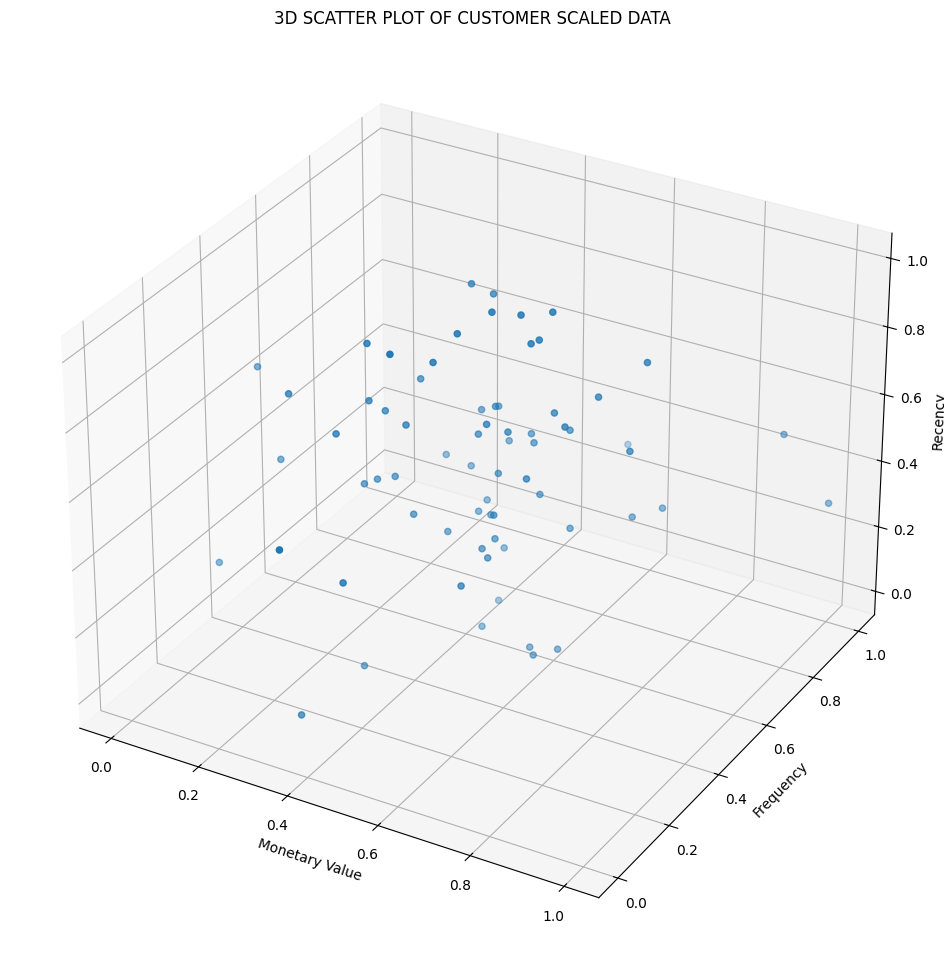

In [77]:
fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df_scaled["monetary_value"], df_scaled["frequency"], df_scaled["recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D SCATTER PLOT OF CUSTOMER SCALED DATA')

KMeans Clustering

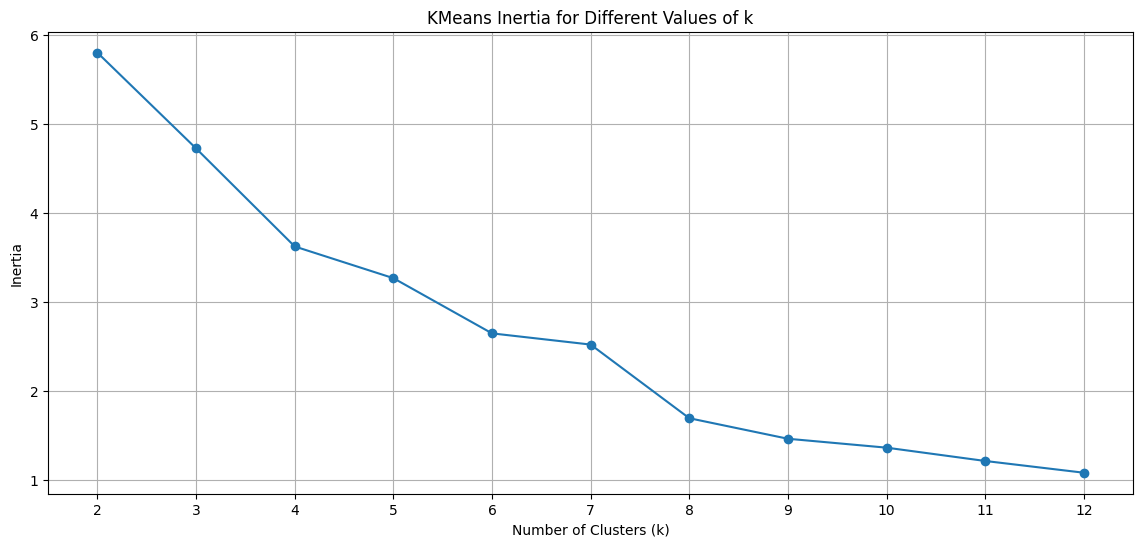

In [78]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    kmeans.fit_predict(df_scaled)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()


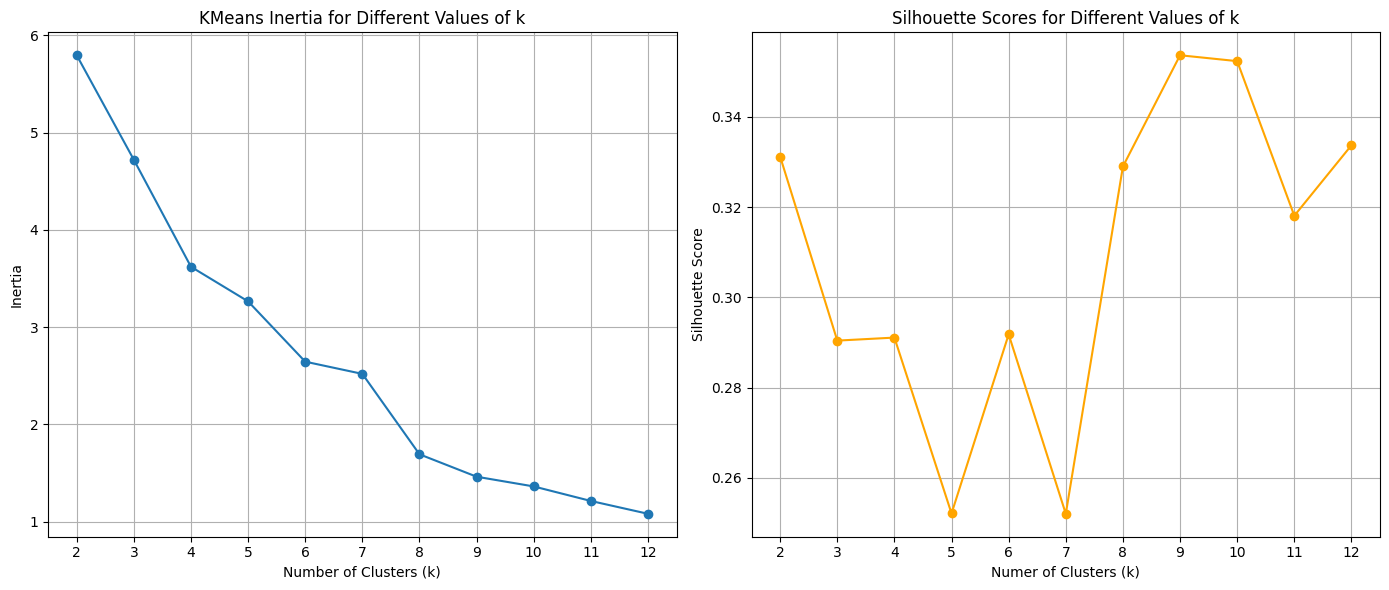

In [79]:
from sklearn.metrics import silhouette_score
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(df_scaled)

    sil_score = silhouette_score(df_scaled, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Numer of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


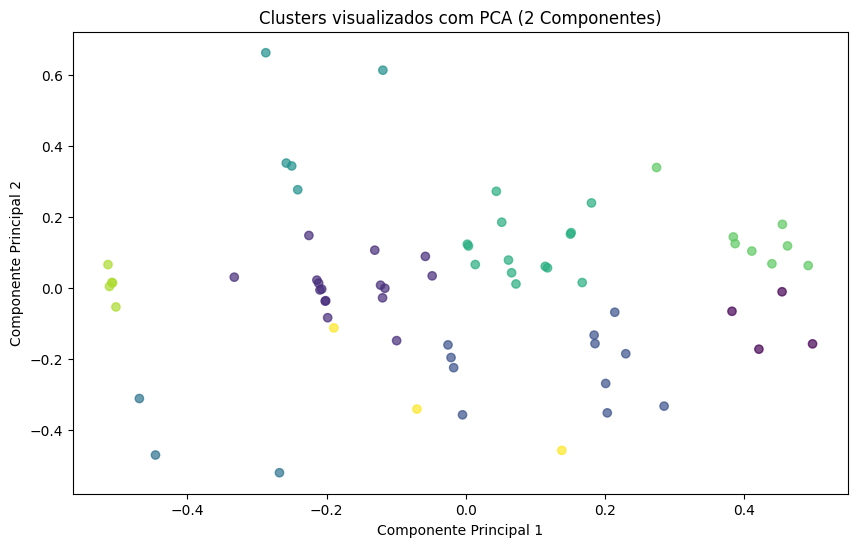

In [80]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Suponha que df_scaled seja seu DataFrame pandas com dados normalizados
# e que ele já tenha sido definido em algum lugar do seu código

# Definir número de clusters (exemplo: k=4)
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)  # df_scaled são os dados normalizados

# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Criar gráfico de dispersão 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters visualizados com PCA (2 Componentes)")
plt.show()

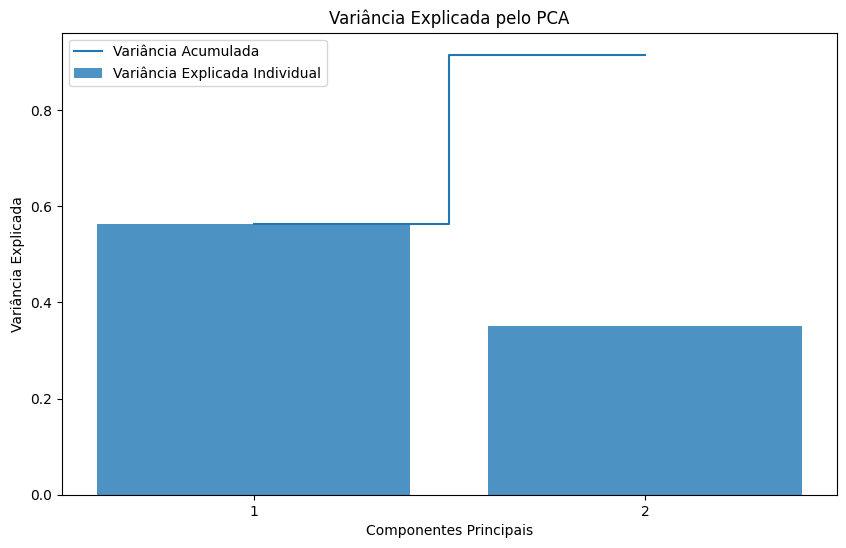

Variância Explicada Individual: [0.56411787 0.35128092]
Variância Acumulada: [0.56411787 0.9153988 ]


In [81]:

# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Variância acumulada
variancia_acumulada = np.cumsum(variancia_explicada)

# Gráfico da variância explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.8, align='center', label='Variância Explicada Individual')
plt.step(range(1, len(variancia_acumulada) + 1), variancia_acumulada, where='mid', label='Variância Acumulada')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada pelo PCA')
plt.xticks(range(1, len(variancia_explicada) + 1))
plt.legend()
plt.show()

# Imprimir a variância explicada e acumulada
print("Variância Explicada Individual:", variancia_explicada)
print("Variância Acumulada:", variancia_acumulada)

Ok, como a variância acumulada das duas componentes deu >90%, isso é ótimo, indica que as duas primeiras componentes principais capturam a grande maioria da informação dos dados.

In [82]:
not_outliers_df.head()

branch  monetary_value  frequency last_invoice_date  recency
0  WALM001         2359.44         64        2023-12-24        8
1  WALM002         2006.28         55        2023-12-23        9
3  WALM004         2726.40         53        2023-12-29        3
5  WALM006         3142.08         66        2023-12-29        3
6  WALM007         2997.60         59        2023-12-26        6

In [83]:
df_scaled.head()

monetary_value  frequency   recency
0        0.455857   0.619377  0.627719
1        0.373484   0.418900  0.671798
2        0.530801   0.356869  0.298727
3        0.605776   0.651406  0.298727
4        0.580749   0.521468  0.524371

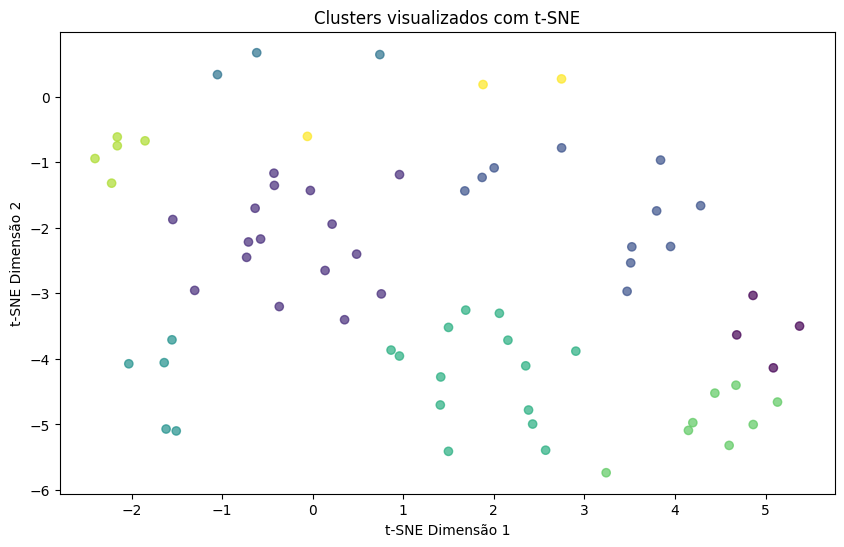

In [84]:
from sklearn.manifold import TSNE

# Aplicar t-SNE para reduzir para 2 dimensões
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Dimensão 1")
plt.ylabel("t-SNE Dimensão 2")
plt.title("Clusters visualizados com t-SNE")
plt.show()


In [85]:
#Based on the results, we choose to follow with 8 clusters

cluster_labels = kmeans.fit_predict(df_scaled)

cluster_labels


array([5, 2, 8, 1, 5, 7, 1, 5, 8, 8, 4, 6, 5, 1, 5, 6, 0, 1, 7, 4, 5, 6,
       3, 1, 6, 0, 5, 6, 4, 5, 0, 5, 1, 7, 6, 5, 2, 1, 1, 1, 1, 1, 2, 7,
       5, 3, 2, 2, 2, 4, 1, 2, 5, 1, 6, 2, 1, 5, 6, 5, 7, 0, 2, 1, 1, 2,
       2, 4, 3], dtype=int32)

In [86]:
not_outliers_df["cluster"] = cluster_labels

# Fazer o merge dos DataFrames usando 'branch' como chave
not_outliers_df = pd.merge(not_outliers_df, df[['branch', 'city']].drop_duplicates(), on='branch', how='left')

# Exibir o DataFrame not_outliers_df com a nova coluna 'city'
print(not_outliers_df)

not_outliers_df

     branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
2   WALM004         2726.40         53        2023-12-29        3        8   
3   WALM006         3142.08         66        2023-12-29        3        1   
4   WALM007         2997.60         59        2023-12-26        6        5   
..      ...             ...        ...               ...      ...      ...   
64  WALM096         1761.18         68        2023-12-28        4        1   
65  WALM097          924.66         57        2023-12-23        9        2   
66  WALM098         1110.42         55        2023-12-27        5        2   
67  WALM099         2799.90        158        2023-12-29        3        4   
68  WALM100          917.64         52        2023-12-30        2        3   

             city  
0         Houston  
1          Dallas  
2  

C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_18740\963507794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_outliers_df["cluster"] = cluster_labels


branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
2   WALM004         2726.40         53        2023-12-29        3        8   
3   WALM006         3142.08         66        2023-12-29        3        1   
4   WALM007         2997.60         59        2023-12-26        6        5   
..      ...             ...        ...               ...      ...      ...   
64  WALM096         1761.18         68        2023-12-28        4        1   
65  WALM097          924.66         57        2023-12-23        9        2   
66  WALM098         1110.42         55        2023-12-27        5        2   
67  WALM099         2799.90        158        2023-12-29        3        4   
68  WALM100          917.64         52        2023-12-30        2        3   

             city  
0         Houston  
1          Dallas  
2          Austin  
3         El Paso  
4       Arlington  
..            ...  
64     Eagle Pass  
65          Alice  
66  Mineral Wells  
67    Weatherford  
68         Canyon  

[69 rows x 7 columns]

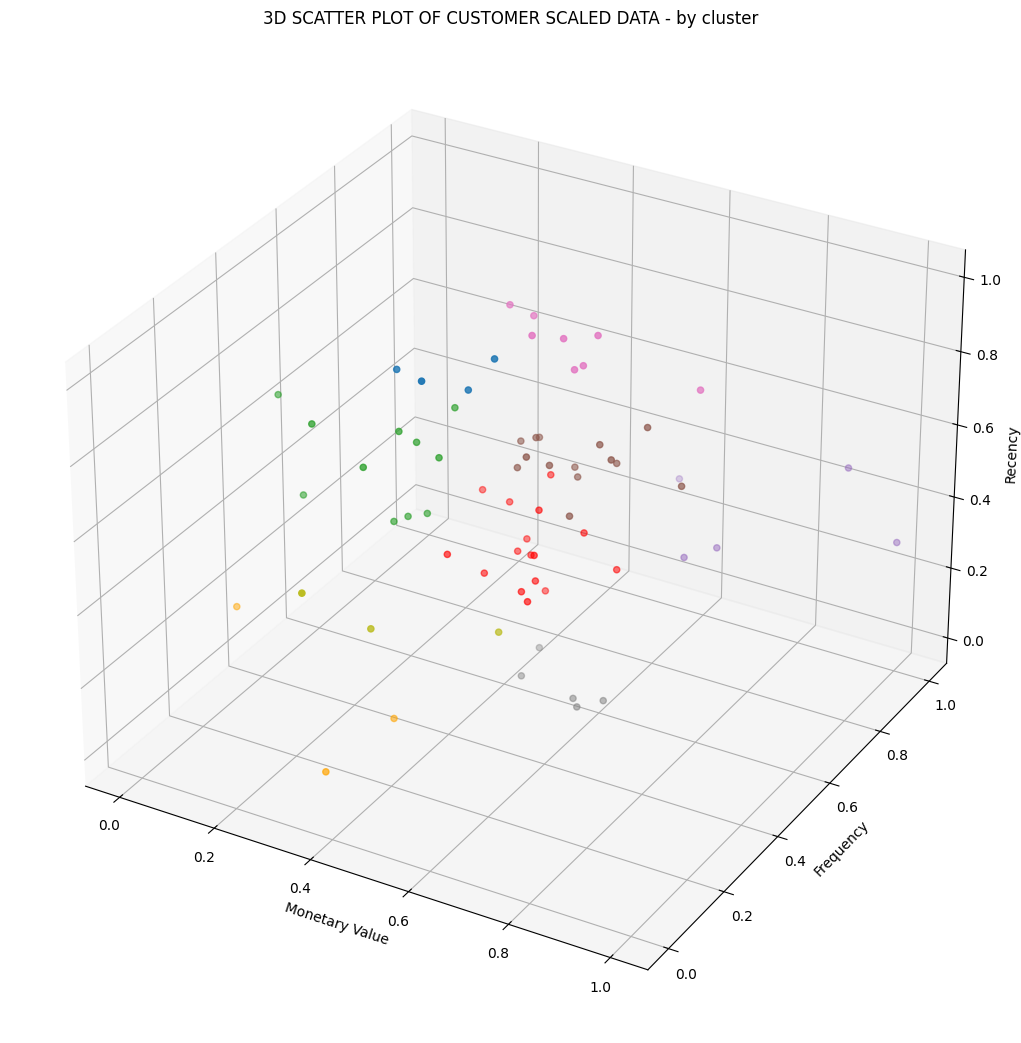

In [87]:
cluster_colors = {
                    0: '#1f77b4',   # Azul
                    1: '#ff0000',   # Vermelho
                    2: '#2ca02c',   # Verde
                    3: '#ffa502',   # Laranja
                    4: '#9467bd',   # Roxo
                    5: '#8c564b',   # Marrom
                    6: '#e377c2',   # Rosa
                    7: '#7f7f7f',   # Cinza
                    8: '#bcbd22',   # Amarelo-esverdeado
                  }

colors = not_outliers_df['cluster'].map(cluster_colors)

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(df_scaled["monetary_value"], df_scaled["frequency"], df_scaled["recency"], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D SCATTER PLOT OF CUSTOMER SCALED DATA - by cluster')

plt.show()

## Adicionar legenda no gráfico acima

In [114]:
!pip install folium
!pip install geopandas
!pip install cartopy
!pip install geopy




[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
not_outliers_df.head(10)

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0  WALM001         2359.44         64        2023-12-24        8        5   
1  WALM002         2006.28         55        2023-12-23        9        2   
2  WALM004         2726.40         53        2023-12-29        3        8   
3  WALM006         3142.08         66        2023-12-29        3        1   
4  WALM007         2997.60         59        2023-12-26        6        5   
5  WALM008         3279.84         61        2023-12-31        1        7   
6  WALM011         2548.32         58        2023-12-29        3        1   
7  WALM012         3510.72         66        2023-12-22       10        5   
8  WALM013         2064.00         48        2023-12-28        4        8   
9  WALM014         1908.48         45        2023-12-25        7        8   

             city  
0         Houston  
1          Dallas  
2          Austin  
3         El Paso  
4       Arlington  
5  Corpus Christi  
6         Lubbock  
7         Garland  
8          Irving  
9        Amarillo

In [98]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# Inicializa o geolocalizador
geolocator = Nominatim(user_agent="meu_app_geolocalizacao")

# Função para obter latitude e longitude
def get_coordinates(city):
    try:
        location = geolocator.geocode(city, timeout=10)
        if location:
            return location.latitude, location.longitude
    except GeocoderTimedOut:
        print(f"Timeout ao buscar: {city}")
    return None, None  # Retorna exatamente 2 valores, garantindo consistência

# Aplica a função corretamente e transforma em DataFrame
coords_df = not_outliers_df["city"].apply(lambda x: pd.Series(get_coordinates(x), index=["latitude", "longitude"]))

# Adiciona ao DataFrame original
not_outliers_df = pd.concat([not_outliers_df, coords_df], axis=1)

print(not_outliers_df)

     branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
2   WALM004         2726.40         53        2023-12-29        3        8   
3   WALM006         3142.08         66        2023-12-29        3        1   
4   WALM007         2997.60         59        2023-12-26        6        5   
..      ...             ...        ...               ...      ...      ...   
64  WALM096         1761.18         68        2023-12-28        4        1   
65  WALM097          924.66         57        2023-12-23        9        2   
66  WALM098         1110.42         55        2023-12-27        5        2   
67  WALM099         2799.90        158        2023-12-29        3        4   
68  WALM100          917.64         52        2023-12-30        2        3   

             city   latitude   longitude  
0         Houston  2

In [99]:
print(not_outliers_df.columns)


Index(['branch', 'monetary_value', 'frequency', 'last_invoice_date', 'recency',
       'cluster', 'city', 'latitude', 'longitude'],
      dtype='object')


In [100]:
not_outliers_df = not_outliers_df.loc[:, ~not_outliers_df.columns.duplicated()]

In [101]:
print(not_outliers_df.columns)


Index(['branch', 'monetary_value', 'frequency', 'last_invoice_date', 'recency',
       'cluster', 'city', 'latitude', 'longitude'],
      dtype='object')


In [102]:
import folium
from folium.plugins import MarkerCluster


not_outliers_df["latitude"] = not_outliers_df["latitude"].squeeze()
not_outliers_df["longitude"] = not_outliers_df["longitude"].squeeze()

not_outliers_df["latitude"] = pd.to_numeric(not_outliers_df["latitude"], errors="coerce")
not_outliers_df["longitude"] = pd.to_numeric(not_outliers_df["longitude"], errors="coerce")

# Criar um mapa centralizado na média das coordenadas coletadas
mapa = folium.Map(location=[(not_outliers_df["latitude"].mean()), (not_outliers_df["longitude"].mean())], zoom_start=3)

# Criar um agrupador de marcadores para facilitar visualização
marker_cluster = MarkerCluster().add_to(mapa)


# cluster_colors já foi definido anteriormente, quando plotamos o '3D SCATTER PLOT OF CUSTOMER SCALED DATA - by cluster'

# Adicionar pontos ao mapa
for _, row in not_outliers_df.iterrows():
    if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):  # Garantir que as coordenadas são válidas
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=5,
            color=cluster_colors.get(row["cluster"], "gray"),  # Cor do cluster (ou cinza se não encontrado)
            fill=True,
            fill_color=cluster_colors.get(row["cluster"], "gray"),
            fill_opacity=0.7,
            popup=f"Filial: {row['branch']}<br>Cidade: {row['city']}<br>Cluster: {row['cluster']}"
        ).add_to(marker_cluster)

# Exibir o mapa
mapa.save("mapa_filiais.html")  # Salva o mapa em um arquivo HTML
mapa  # Exibe no Jupyter Notebook (se estiver usando)

In [103]:
not_outliers_df.head()

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0  WALM001         2359.44         64        2023-12-24        8        5   
1  WALM002         2006.28         55        2023-12-23        9        2   
2  WALM004         2726.40         53        2023-12-29        3        8   
3  WALM006         3142.08         66        2023-12-29        3        1   
4  WALM007         2997.60         59        2023-12-26        6        5   

        city   latitude   longitude  
0    Houston  29.758938  -95.367697  
1     Dallas  32.776272  -96.796856  
2     Austin  30.271129  -97.743700  
3    El Paso  31.760116 -106.487040  
4  Arlington  32.735582  -97.107119

In [104]:
# Definição aproximada dos limites do Texas
# Identificamos visualmente que 3 cidades (conforme coordenadas encontradas) estão fora dos USA
# Identificamos visualmente que 6 cidades (conforme coordenadas encontradas) estão dentro dos USA, mas fora do Texas
LAT_MIN, LAT_MAX = 25.0, 36.5  # Latitude do Texas (aproximadamente)
LON_MIN, LON_MAX = -106.7, -93.5  # Longitude do Texas (aproximadamente)

# Filtrar as branchs que estão FORA desses limites
filiais_fora_do_texas = not_outliers_df[
    (not_outliers_df["latitude"] < LAT_MIN) | 
    (not_outliers_df["latitude"] > LAT_MAX) | 
    (not_outliers_df["longitude"] < LON_MIN) | 
    (not_outliers_df["longitude"] > LON_MAX)
]

# Exibir as filiais que estão fora do Texas
print("Branchs fora do Texas:")
print(filiais_fora_do_texas[["branch", "city", "latitude", "longitude"]])

Branchs fora do Texas:
     branch        city   latitude   longitude
13  WALM018      Frisco  37.779259 -122.419329
14  WALM019    Pasadena  34.147651 -118.144155
21  WALM028      Odessa  46.484302   30.732288
23  WALM036       Allen  40.807780  -84.057222
26  WALM040    Edinburg  55.953346   -3.188375
34  WALM052   Mansfield  40.758390  -82.515447
38  WALM060      DeSoto  27.190253  -81.824423
41  WALM063  Georgetown   6.813743  -58.162447
42  WALM064     Bedford  40.027145  -78.523745
48  WALM072   Lancaster  40.037996  -76.305671
50  WALM076  Huntsville  34.729847  -86.585901
58  WALM088    Cleburne  33.650696  -85.501736


In [105]:
# Criar um geolocalizador
geolocator = Nominatim(user_agent="geo_correction")

# Lista de branchs que tiveram erro (insira os nomes exatos)
branchs_com_erro = filiais_fora_do_texas["branch"]

def get_texas_coordinates(city):
    try:
        location = geolocator.geocode(f"{city}, TX, USA", timeout=10)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            print(f"Não encontrou: {city}")
    except Exception as e:
        print(f"Erro ao buscar {city}: {e}")
    return pd.Series([None, None])

# Aplicar correção apenas para as filiais erradas
mask = not_outliers_df["branch"].isin(branchs_com_erro)
not_outliers_df.loc[mask, ["latitude", "longitude"]] = not_outliers_df.loc[mask, "city"].apply(get_texas_coordinates)

# Exibir resultado para verificação
print(not_outliers_df.loc[mask, ["branch", "city", "latitude", "longitude"]])


     branch        city  latitude  longitude
13  WALM018      Frisco       NaN        NaN
14  WALM019    Pasadena       NaN        NaN
21  WALM028      Odessa       NaN        NaN
23  WALM036       Allen       NaN        NaN
26  WALM040    Edinburg       NaN        NaN
34  WALM052   Mansfield       NaN        NaN
38  WALM060      DeSoto       NaN        NaN
41  WALM063  Georgetown       NaN        NaN
42  WALM064     Bedford       NaN        NaN
48  WALM072   Lancaster       NaN        NaN
50  WALM076  Huntsville       NaN        NaN
58  WALM088    Cleburne       NaN        NaN


Como o geolocator não encontrou coordenadas para essas cidades, limitando-se ao Texas, tivemos que coletar manualmente na Internet as coordenadas.

In [106]:
correcao_coordenadas = {
    "Frisco": (33.1507, -96.8236),
    "Pasadena": (29.6911, -95.2091),
    "Odessa": (31.8457, -102.3676),
    "Allen": (33.1032, -96.6706),
    "Edinburg": (26.3017, -98.1633),
    "Mansfield": (32.5632, -97.1417),
    "DeSoto": (32.5899, -96.8569),
    "Georgetown": (30.6333, -97.6770),
    "Bedford": (32.8440, -97.1436),
    "Lancaster": (32.5921, -96.7561),
    "Huntsville": (30.7235, -95.5508),
    "Cleburne": (32.3476, -97.3867)
}

# Aplicar correção manual
for city, (lat, lon) in correcao_coordenadas.items():
    not_outliers_df.loc[not_outliers_df["city"] == city, ["latitude", "longitude"]] = lat, lon

# Exibir as filiais corrigidas
print(not_outliers_df.loc[mask, ["branch", "city", "latitude", "longitude"]])

     branch        city  latitude  longitude
13  WALM018      Frisco   33.1507   -96.8236
14  WALM019    Pasadena   29.6911   -95.2091
21  WALM028      Odessa   31.8457  -102.3676
23  WALM036       Allen   33.1032   -96.6706
26  WALM040    Edinburg   26.3017   -98.1633
34  WALM052   Mansfield   32.5632   -97.1417
38  WALM060      DeSoto   32.5899   -96.8569
41  WALM063  Georgetown   30.6333   -97.6770
42  WALM064     Bedford   32.8440   -97.1436
48  WALM072   Lancaster   32.5921   -96.7561
50  WALM076  Huntsville   30.7235   -95.5508
58  WALM088    Cleburne   32.3476   -97.3867


In [107]:
# Mapa agora com as coordenadas corrigidas

# Criar um mapa centralizado na média das coordenadas coletadas
mapa = folium.Map(location=[not_outliers_df["latitude"].mean(), not_outliers_df["longitude"].mean()], zoom_start=2)

# Criar um agrupador de marcadores para facilitar visualização
marker_cluster = MarkerCluster().add_to(mapa)

# Adicionar pontos ao mapa
for _, row in not_outliers_df.iterrows():
    if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):  # Garantir que as coordenadas são válidas
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=5,
            color=cluster_colors.get(row["cluster"], "gray"),  # Cor do cluster (ou cinza se não encontrado)
            fill=True,
            fill_color=cluster_colors.get(row["cluster"], "gray"),
            fill_opacity=0.7,
            popup=f"Filial: {row['branch']}<br>Cidade: {row['city']}<br>Cluster: {row['cluster']}"
        ).add_to(marker_cluster)


# Criar um bloco de HTML com a legenda dos clusters
legend_html = """
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 200px; height: 250px;  /* Ajustei a altura para acomodar mais clusters */
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; padding: 10px; opacity: 0.9;
">
    <b>Legenda - Clusters</b><br>
    <span style="color:#1f77b4;">&#9679;</span> Cluster 0<br>
    <span style="color:#ff0000;">&#9679;</span> Cluster 1<br>
    <span style="color:#2ca02c;">&#9679;</span> Cluster 2<br>
    <span style="color:#ffa502;">&#9679;</span> Cluster 3<br>
    <span style="color:#9467bd;">&#9679;</span> Cluster 4<br>
    <span style="color:#8c564b;">&#9679;</span> Cluster 5<br>
    <span style="color:#e377c2;">&#9679;</span> Cluster 6<br>
    <span style="color:#7f7f7f;">&#9679;</span> Cluster 7<br>
    <span style="color:#bcbd22;">&#9679;</span> Cluster 8<br>
</div>
"""

# Adicionar a legenda ao mapa
mapa.get_root().html.add_child(folium.Element(legend_html))

# Exibir o mapa
mapa.save("mapa_filiais_correct.html")  # Salva o mapa em um arquivo HTML
mapa  # Exibe no Jupyter Notebook (se estiver usando)

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

def create_enhanced_map_with_icons(not_outliers_df):
    # Mapeamento de cores para os clusters
    cluster_colors = {
        0: "#1f77b4",  # Azul
        1: "#ff0000",  # Vermelho
        2: "#2ca02c",  # Verde
        3: "#ffa502",  # Laranja
        4: "#9467bd",  # Roxo
        5: "#8c564b",  # Marrom
        6: "#e377c2",  # Rosa
        7: "#7f7f7f",  # Cinza
        8: "#bcbd22"  # Amarelo-esverdeado
    }

    # Criar um mapa centralizado na média das coordenadas coletadas
    mapa = folium.Map(
        location=[not_outliers_df["latitude"].mean(), not_outliers_df["longitude"].mean()],
        zoom_start=2,
        zoom_control=True,
        control_scale=True
    )

    # Calcular a contagem de branches por cluster
    cluster_counts = not_outliers_df.groupby('cluster')['branch'].count()

    # Criar um agrupador de marcadores para facilitar visualização
    marker_cluster = MarkerCluster().add_to(mapa)

    # Adicionar pontos ao mapa com círculos coloridos
    for _, row in not_outliers_df.iterrows():
        if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):
            cluster_color = cluster_colors.get(row["cluster"], "gray")  # Cor padrão se o cluster não for encontrado

            folium.CircleMarker(
                location=[row["latitude"], row["longitude"]],
                radius=5,  # Ajuste o raio conforme necessário
                color=cluster_color,
                fill=True,
                fill_color=cluster_color,
                fill_opacity=0.7,
                popup=f"Filial: {row['branch']}<br>Cidade: {row['city']}<br>Cluster: {row['cluster']}"
            ).add_to(marker_cluster)

    # Legenda com as cores dos clusters
    legend_html = """
        <div style="
            position: fixed;
            bottom: 50px; left: 50px; width: 250px; height: 300px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px; opacity: 0.9;
        ">
            <b>Legenda - Clusters</b><br>
    """

    for cluster, color in cluster_colors.items():
        legend_html += f"""
            <div style="display: flex; align-items: center; margin-bottom: 5px;">
                <i class="fa fa-circle" style="color: {color}; margin-right: 10px;"></i>
                Cluster {cluster} ({cluster_counts.get(cluster, 0)})
            </div>
        """

    legend_html += "</div>"

    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Salvar e imprimir caminho do arquivo
    output_file = "mapa_filiais_circles.html"
    mapa.save(output_file)
    print(f"Mapa salvo em: {output_file}")

    return mapa

# Modificações para Debug
def debug_map_generation(not_outliers_df):
    print("Total de pontos:", len(not_outliers_df))
    print("Coordenadas - Latitude média:", not_outliers_df["latitude"].mean())
    print("Coordenadas - Longitude média:", not_outliers_df["longitude"].mean())

    try:
        mapa = create_enhanced_map_with_icons(not_outliers_df)
        return mapa
    except Exception as e:
        print("Erro ao gerar mapa:", str(e))
        return None

# Use esta linha para gerar o mapa
mapa = debug_map_generation(not_outliers_df)

mapa

Total de pontos: 69
Coordenadas - Latitude média: 31.021540915942026
Coordenadas - Longitude média: -97.61791341884057
Mapa salvo em: mapa_filiais_circles.html


In [121]:
not_outliers_df.head()

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0  WALM001         2359.44         64        2023-12-24        8        5   
1  WALM002         2006.28         55        2023-12-23        9        2   
2  WALM004         2726.40         53        2023-12-29        3        8   
3  WALM006         3142.08         66        2023-12-29        3        1   
4  WALM007         2997.60         59        2023-12-26        6        5   

        city   latitude   longitude  
0    Houston  29.758938  -95.367697  
1     Dallas  32.776272  -96.796856  
2     Austin  30.271129  -97.743700  
3    El Paso  31.760116 -106.487040  
4  Arlington  32.735582  -97.107119

In [122]:
monetary_indices = set(monetary_outliers_df.index)
frequency_indices = set(frequency_outliers_df.index)
recency_indices = set(recency_outliers_df.index)

print("Interseção entre monetary e frequency:", monetary_indices.intersection(frequency_indices))
print("Interseção entre monetary e recency:", monetary_indices.intersection(recency_indices))
print("Interseção entre frequency e recency:", frequency_indices.intersection(recency_indices))

Interseção entre monetary e frequency: {2, 34, 37, 8, 45, 57, 28, 29, 31}
Interseção entre monetary e recency: set()
Interseção entre frequency e recency: set()


In [123]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([2, 8, 28, 29, 31, 34, 37, 45, 57], dtype='int64')

In [124]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
recency_only_outliers = recency_outliers_df
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]


monetary_only_outliers["cluster"] = -1
frequency_only_outliers["cluster"] = -2
recency_only_outliers["cluster"] = -3
monetary_and_frequency_outliers["cluster"] = -4

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, recency_only_outliers, monetary_and_frequency_outliers])

# Fazer o merge dos DataFrames usando 'branch' como chave
outlier_clusters_df = pd.merge(outlier_clusters_df, df[['branch', 'city']].drop_duplicates(), on='branch', how='left')

# Exibir o DataFrame outliers_clusters_df com a nova coluna 'city'
print(outlier_clusters_df)

outlier_clusters_df

     branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM050         7460.64        147        2023-12-30        2       -1   
1   WALM054         4085.25        171        2023-12-22       10       -2   
2   WALM055         5793.48        174        2023-12-29        3       -2   
3   WALM056         5149.98        161        2023-12-26        6       -2   
4   WALM065         5754.21        168        2023-12-31        1       -2   
5   WALM069         6499.68        206        2023-12-31        1       -2   
6   WALM074         6461.40        193        2023-12-30        2       -2   
7   WALM075         5912.94        172        2023-12-31        1       -2   
8   WALM082         5935.05        177        2023-12-30        2       -2   
9   WALM084         6753.78        195        2023-12-30        2       -2   
10  WALM086         5285.28        168        2023-12-31        1       -2   
11  WALM087         5554.56        177        2023-12-31        

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM050         7460.64        147        2023-12-30        2       -1   
1   WALM054         4085.25        171        2023-12-22       10       -2   
2   WALM055         5793.48        174        2023-12-29        3       -2   
3   WALM056         5149.98        161        2023-12-26        6       -2   
4   WALM065         5754.21        168        2023-12-31        1       -2   
5   WALM069         6499.68        206        2023-12-31        1       -2   
6   WALM074         6461.40        193        2023-12-30        2       -2   
7   WALM075         5912.94        172        2023-12-31        1       -2   
8   WALM082         5935.05        177        2023-12-30        2       -2   
9   WALM084         6753.78        195        2023-12-30        2       -2   
10  WALM086         5285.28        168        2023-12-31        1       -2   
11  WALM087         5554.56        177        2023-12-31        1       -2   
12  WALM089         5775.99        172        2023-12-28        4       -2   
13  WALM005         3396.96         71        2023-11-20       42       -3   
14  WALM010         2874.24         58        2023-12-02       30       -3   
15  WALM022         3373.92         66        2023-12-11       21       -3   
16  WALM026         3008.64         61        2023-12-01       31       -3   
17  WALM033         2321.28         51        2023-12-06       26       -3   
18  WALM034         2400.48         48        2023-10-19       74       -3   
19  WALM042         2494.56         50        2023-11-23       39       -3   
20  WALM047         3370.08         69        2023-12-05       27       -3   
21  WALM092         1175.13         46        2023-12-10       22       -3   
22  WALM003         8472.00        170        2023-12-27        5       -4   
23  WALM009        10692.00        224        2023-12-31        1       -4   
24  WALM029         9288.00        185        2023-12-25        7       -4   
25  WALM030         9960.48        218        2023-12-29        3       -4   
26  WALM032         8166.24        166        2023-12-30        2       -4   
27  WALM035         7997.28        164        2023-12-30        2       -4   
28  WALM038         8726.88        181        2023-12-26        6       -4   
29  WALM046         8876.64        180        2023-12-31        1       -4   
30  WALM058         7462.62        231        2023-12-28        4       -4   

               city  
0          Victoria  
1           Sherman  
2        Waxahachie  
3           Rowlett  
4        Texas City  
5          Rockwall  
6           Weslaco  
7        San Marcos  
8           Weslaco  
9           Schertz  
10        Rosenberg  
11       Waxahachie  
12        Southlake  
13       Fort Worth  
14           Laredo  
15         Mesquite  
16           Denton  
17         Pearland  
18  College Station  
19            Bryan  
20     Flower Mound  
21     Lake Jackson  
22      San Antonio  
23            Plano  
24       Round Rock  
25       Richardson  
26            Tyler  
27       San Angelo  
28       Sugar Land  
29           Temple  
30      Port Arthur

In [125]:
recency_only_outliers["cluster"]

4    -3
9    -3
21   -3
25   -3
32   -3
33   -3
41   -3
46   -3
91   -3
Name: cluster, dtype: int64

In [126]:
frequency_only_outliers["cluster"]

53   -2
54   -2
55   -2
64   -2
68   -2
73   -2
74   -2
81   -2
83   -2
85   -2
86   -2
88   -2
Name: cluster, dtype: int64

In [127]:
monetary_and_frequency_outliers["cluster"]

2    -4
8    -4
28   -4
29   -4
31   -4
34   -4
37   -4
45   -4
57   -4
Name: cluster, dtype: int64

In [128]:
not_outliers_df.drop(columns=['latitude'], inplace=True)
not_outliers_df.drop(columns=['longitude'], inplace=True)

not_outliers_df

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
2   WALM004         2726.40         53        2023-12-29        3        8   
3   WALM006         3142.08         66        2023-12-29        3        1   
4   WALM007         2997.60         59        2023-12-26        6        5   
..      ...             ...        ...               ...      ...      ...   
64  WALM096         1761.18         68        2023-12-28        4        1   
65  WALM097          924.66         57        2023-12-23        9        2   
66  WALM098         1110.42         55        2023-12-27        5        2   
67  WALM099         2799.90        158        2023-12-29        3        4   
68  WALM100          917.64         52        2023-12-30        2        3   

             city  
0         Houston  
1          Dallas  
2          Austin  
3         El Paso  
4       Arlington  
..            ...  
64     Eagle Pass  
65          Alice  
66  Mineral Wells  
67    Weatherford  
68         Canyon  

[69 rows x 7 columns]

In [129]:
outlier_clusters_df

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM050         7460.64        147        2023-12-30        2       -1   
1   WALM054         4085.25        171        2023-12-22       10       -2   
2   WALM055         5793.48        174        2023-12-29        3       -2   
3   WALM056         5149.98        161        2023-12-26        6       -2   
4   WALM065         5754.21        168        2023-12-31        1       -2   
5   WALM069         6499.68        206        2023-12-31        1       -2   
6   WALM074         6461.40        193        2023-12-30        2       -2   
7   WALM075         5912.94        172        2023-12-31        1       -2   
8   WALM082         5935.05        177        2023-12-30        2       -2   
9   WALM084         6753.78        195        2023-12-30        2       -2   
10  WALM086         5285.28        168        2023-12-31        1       -2   
11  WALM087         5554.56        177        2023-12-31        1       -2   
12  WALM089         5775.99        172        2023-12-28        4       -2   
13  WALM005         3396.96         71        2023-11-20       42       -3   
14  WALM010         2874.24         58        2023-12-02       30       -3   
15  WALM022         3373.92         66        2023-12-11       21       -3   
16  WALM026         3008.64         61        2023-12-01       31       -3   
17  WALM033         2321.28         51        2023-12-06       26       -3   
18  WALM034         2400.48         48        2023-10-19       74       -3   
19  WALM042         2494.56         50        2023-11-23       39       -3   
20  WALM047         3370.08         69        2023-12-05       27       -3   
21  WALM092         1175.13         46        2023-12-10       22       -3   
22  WALM003         8472.00        170        2023-12-27        5       -4   
23  WALM009        10692.00        224        2023-12-31        1       -4   
24  WALM029         9288.00        185        2023-12-25        7       -4   
25  WALM030         9960.48        218        2023-12-29        3       -4   
26  WALM032         8166.24        166        2023-12-30        2       -4   
27  WALM035         7997.28        164        2023-12-30        2       -4   
28  WALM038         8726.88        181        2023-12-26        6       -4   
29  WALM046         8876.64        180        2023-12-31        1       -4   
30  WALM058         7462.62        231        2023-12-28        4       -4   

               city  
0          Victoria  
1           Sherman  
2        Waxahachie  
3           Rowlett  
4        Texas City  
5          Rockwall  
6           Weslaco  
7        San Marcos  
8           Weslaco  
9           Schertz  
10        Rosenberg  
11       Waxahachie  
12        Southlake  
13       Fort Worth  
14           Laredo  
15         Mesquite  
16           Denton  
17         Pearland  
18  College Station  
19            Bryan  
20     Flower Mound  
21     Lake Jackson  
22      San Antonio  
23            Plano  
24       Round Rock  
25       Richardson  
26            Tyler  
27       San Angelo  
28       Sugar Land  
29           Temple  
30      Port Arthur

In [130]:
# Concatenar os DataFrames ao longo das linhas (axis=0)
df_combined_final = pd.concat([not_outliers_df, outlier_clusters_df], axis=0)

# Exibir o DataFrame combinado
df_combined_final

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
2   WALM004         2726.40         53        2023-12-29        3        8   
3   WALM006         3142.08         66        2023-12-29        3        1   
4   WALM007         2997.60         59        2023-12-26        6        5   
..      ...             ...        ...               ...      ...      ...   
26  WALM032         8166.24        166        2023-12-30        2       -4   
27  WALM035         7997.28        164        2023-12-30        2       -4   
28  WALM038         8726.88        181        2023-12-26        6       -4   
29  WALM046         8876.64        180        2023-12-31        1       -4   
30  WALM058         7462.62        231        2023-12-28        4       -4   

           city  
0       Houston  
1        Dallas  
2        Austin  
3       El Paso  
4     Arlington  
..          ...  
26        Tyler  
27   San Angelo  
28   Sugar Land  
29       Temple  
30  Port Arthur  

[100 rows x 7 columns]

In [131]:
df_combined_final = df_combined_final.sort_values(by='branch', ascending=True)
df_combined_final

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
22  WALM003         8472.00        170        2023-12-27        5       -4   
2   WALM004         2726.40         53        2023-12-29        3        8   
13  WALM005         3396.96         71        2023-11-20       42       -3   
..      ...             ...        ...               ...      ...      ...   
64  WALM096         1761.18         68        2023-12-28        4        1   
65  WALM097          924.66         57        2023-12-23        9        2   
66  WALM098         1110.42         55        2023-12-27        5        2   
67  WALM099         2799.90        158        2023-12-29        3        4   
68  WALM100          917.64         52        2023-12-30        2        3   

             city  
0         Houston  
1          Dallas  
22    San Antonio  
2          Austin  
13     Fort Worth  
..            ...  
64     Eagle Pass  
65          Alice  
66  Mineral Wells  
67    Weatherford  
68         Canyon  

[100 rows x 7 columns]

In [132]:
# 1. Resetar o índice
df_combined_final = df_combined_final.reset_index(drop=True)

df_combined_final

branch  monetary_value  frequency last_invoice_date  recency  cluster  \
0   WALM001         2359.44         64        2023-12-24        8        5   
1   WALM002         2006.28         55        2023-12-23        9        2   
2   WALM003         8472.00        170        2023-12-27        5       -4   
3   WALM004         2726.40         53        2023-12-29        3        8   
4   WALM005         3396.96         71        2023-11-20       42       -3   
..      ...             ...        ...               ...      ...      ...   
95  WALM096         1761.18         68        2023-12-28        4        1   
96  WALM097          924.66         57        2023-12-23        9        2   
97  WALM098         1110.42         55        2023-12-27        5        2   
98  WALM099         2799.90        158        2023-12-29        3        4   
99  WALM100          917.64         52        2023-12-30        2        3   

             city  
0         Houston  
1          Dallas  
2     San Antonio  
3          Austin  
4      Fort Worth  
..            ...  
95     Eagle Pass  
96          Alice  
97  Mineral Wells  
98    Weatherford  
99         Canyon  

[100 rows x 7 columns]

In [133]:
print(df)

      invoice_id   branch         city             category  unit_price  \
1000        1001  WALM012      Garland   Home and lifestyle        55.0   
1001        1002  WALM013       Irving  Fashion accessories        53.0   
1002        1003  WALM090    Brownwood   Home and lifestyle        66.0   
1003        1004  WALM031   Lewisville  Fashion accessories        36.0   
1004        1005  WALM003  San Antonio   Home and lifestyle        50.0   
...          ...      ...          ...                  ...         ...   
9964        9996  WALM056      Rowlett  Fashion accessories        37.0   
9965        9997  WALM030   Richardson   Home and lifestyle        58.0   
9966        9998  WALM050     Victoria  Fashion accessories        52.0   
9967        9999  WALM032        Tyler   Home and lifestyle        79.0   
9968       10000  WALM069     Rockwall  Fashion accessories        62.0   

      quantity       date  time payment_method  rating  profit_margin  total  \
1000       2.0 2022

In [134]:
df_combined_final.columns

Index(['branch', 'monetary_value', 'frequency', 'last_invoice_date', 'recency',
       'cluster', 'city'],
      dtype='object')

In [135]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day', 'total_profit', 'year'],
      dtype='object')

In [136]:
# Fazer o merge dos DataFrames usando 'branch' e 'city' como chaves
df_combined_merge = pd.merge(df, df_combined_final[['branch', 'city', 'cluster']], on=['branch', 'city'], how='left')

# Exibir o DataFrame df com a nova coluna 'cluster'
print(df_combined_merge)

      invoice_id   branch         city             category  unit_price  \
0           1001  WALM012      Garland   Home and lifestyle        55.0   
1           1002  WALM013       Irving  Fashion accessories        53.0   
2           1003  WALM090    Brownwood   Home and lifestyle        66.0   
3           1004  WALM031   Lewisville  Fashion accessories        36.0   
4           1005  WALM003  San Antonio   Home and lifestyle        50.0   
...          ...      ...          ...                  ...         ...   
8964        9996  WALM056      Rowlett  Fashion accessories        37.0   
8965        9997  WALM030   Richardson   Home and lifestyle        58.0   
8966        9998  WALM050     Victoria  Fashion accessories        52.0   
8967        9999  WALM032        Tyler   Home and lifestyle        79.0   
8968       10000  WALM069     Rockwall  Fashion accessories        62.0   

      quantity       date  time payment_method  rating  profit_margin  total  \
0          2.0 2022

In [137]:
df_combined_merge.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day', 'total_profit', 'year',
       'cluster'],
      dtype='object')

In [138]:
df_combined_merge.head()

invoice_id   branch         city             category  unit_price  \
0        1001  WALM012      Garland   Home and lifestyle        55.0   
1        1002  WALM013       Irving  Fashion accessories        53.0   
2        1003  WALM090    Brownwood   Home and lifestyle        66.0   
3        1004  WALM031   Lewisville  Fashion accessories        36.0   
4        1005  WALM003  San Antonio   Home and lifestyle        50.0   

   quantity       date  time payment_method  rating  profit_margin  total  \
0       2.0 2022-10-09    15        Ewallet     6.0           0.48  110.0   
1       2.0 2020-04-06    10        Ewallet     8.0           0.48  106.0   
2       2.0 2020-08-04    13        Ewallet     7.0           0.33  132.0   
3       1.0 2022-10-18    19        Ewallet     7.0           0.48   36.0   
4       3.0 2023-10-30    19        Ewallet     7.0           0.36  150.0   

    ano  day_of_week  month period_of_day  total_profit  year  cluster  
0  2022            6     10         Tarde         52.80  2022        5  
1  2020            0      4         Manhã         50.88  2020        8  
2  2020            1      8         Tarde         43.56  2020        5  
3  2022            1     10         Noite         17.28  2022        3  
4  2023            0     10         Noite         54.00  2023       -4

In [139]:
cluster_colors = {
    -4: "#800080",  # Roxo Escuro (ou outra cor de sua escolha)
    -3: "#008080",  # Verde Azulado Escuro (ou outra cor de sua escolha)
    -2: "#8B4513",  # Marrom Sela (ou outra cor de sua escolha)
    -1: "#4682B4",  # Azul Aço (ou outra cor de sua escolha)
    0: "#1f77b4",   # Azul
    1: "#ff0000",   # Vermelho
    2: "#2ca02c",   # Verde
    3: "#ffa502",   # Laranja
    4: "#9467bd",   # Roxo
    5: "#8c564b",   # Marrom
    6: "#e377c2",   # Rosa
    7: "#7f7f7f",   # Cinza
    8: "#bcbd22"    # Amarelo-esverdeado
}

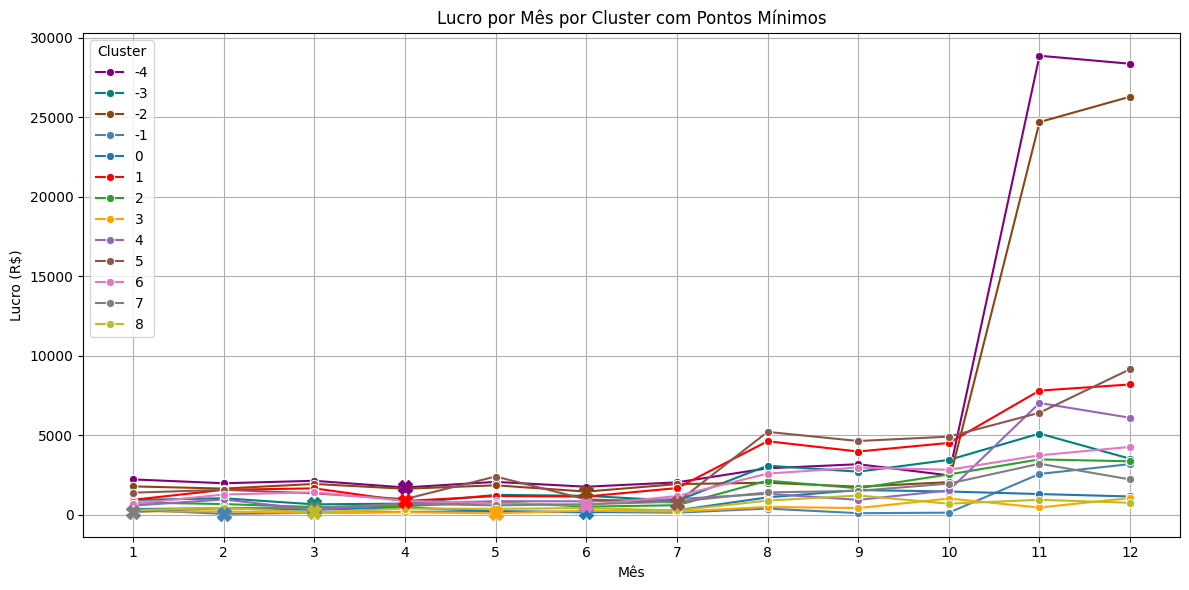

In [140]:

# Agrupar por mês e cluster, e calcular a soma do lucro
profit_by_month_cluster = df_combined_merge.groupby(["month", "cluster"])["total_profit"].sum().reset_index()

# Encontrar os pontos mínimos de cada cluster
min_points = profit_by_month_cluster.loc[profit_by_month_cluster.groupby("cluster")["total_profit"].idxmin()]

# Criar o gráfico de linhas com seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="total_profit", hue="cluster", data=profit_by_month_cluster, marker="o", palette=cluster_colors)

# Adicionar marcadores "X" aos pontos mínimos
for _, row in min_points.iterrows():
    plt.plot(row["month"], row["total_profit"], marker="X", markersize=10, color=cluster_colors[row["cluster"]])

# Configurações do gráfico
plt.xticks(range(1, 13))
plt.title("Lucro por Mês por Cluster com Pontos Mínimos")
plt.xlabel("Mês")
plt.ylabel("Lucro (R$)")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()

plt.show()

AttributeError: 'FacetGrid' object has no attribute 'set_xticks'

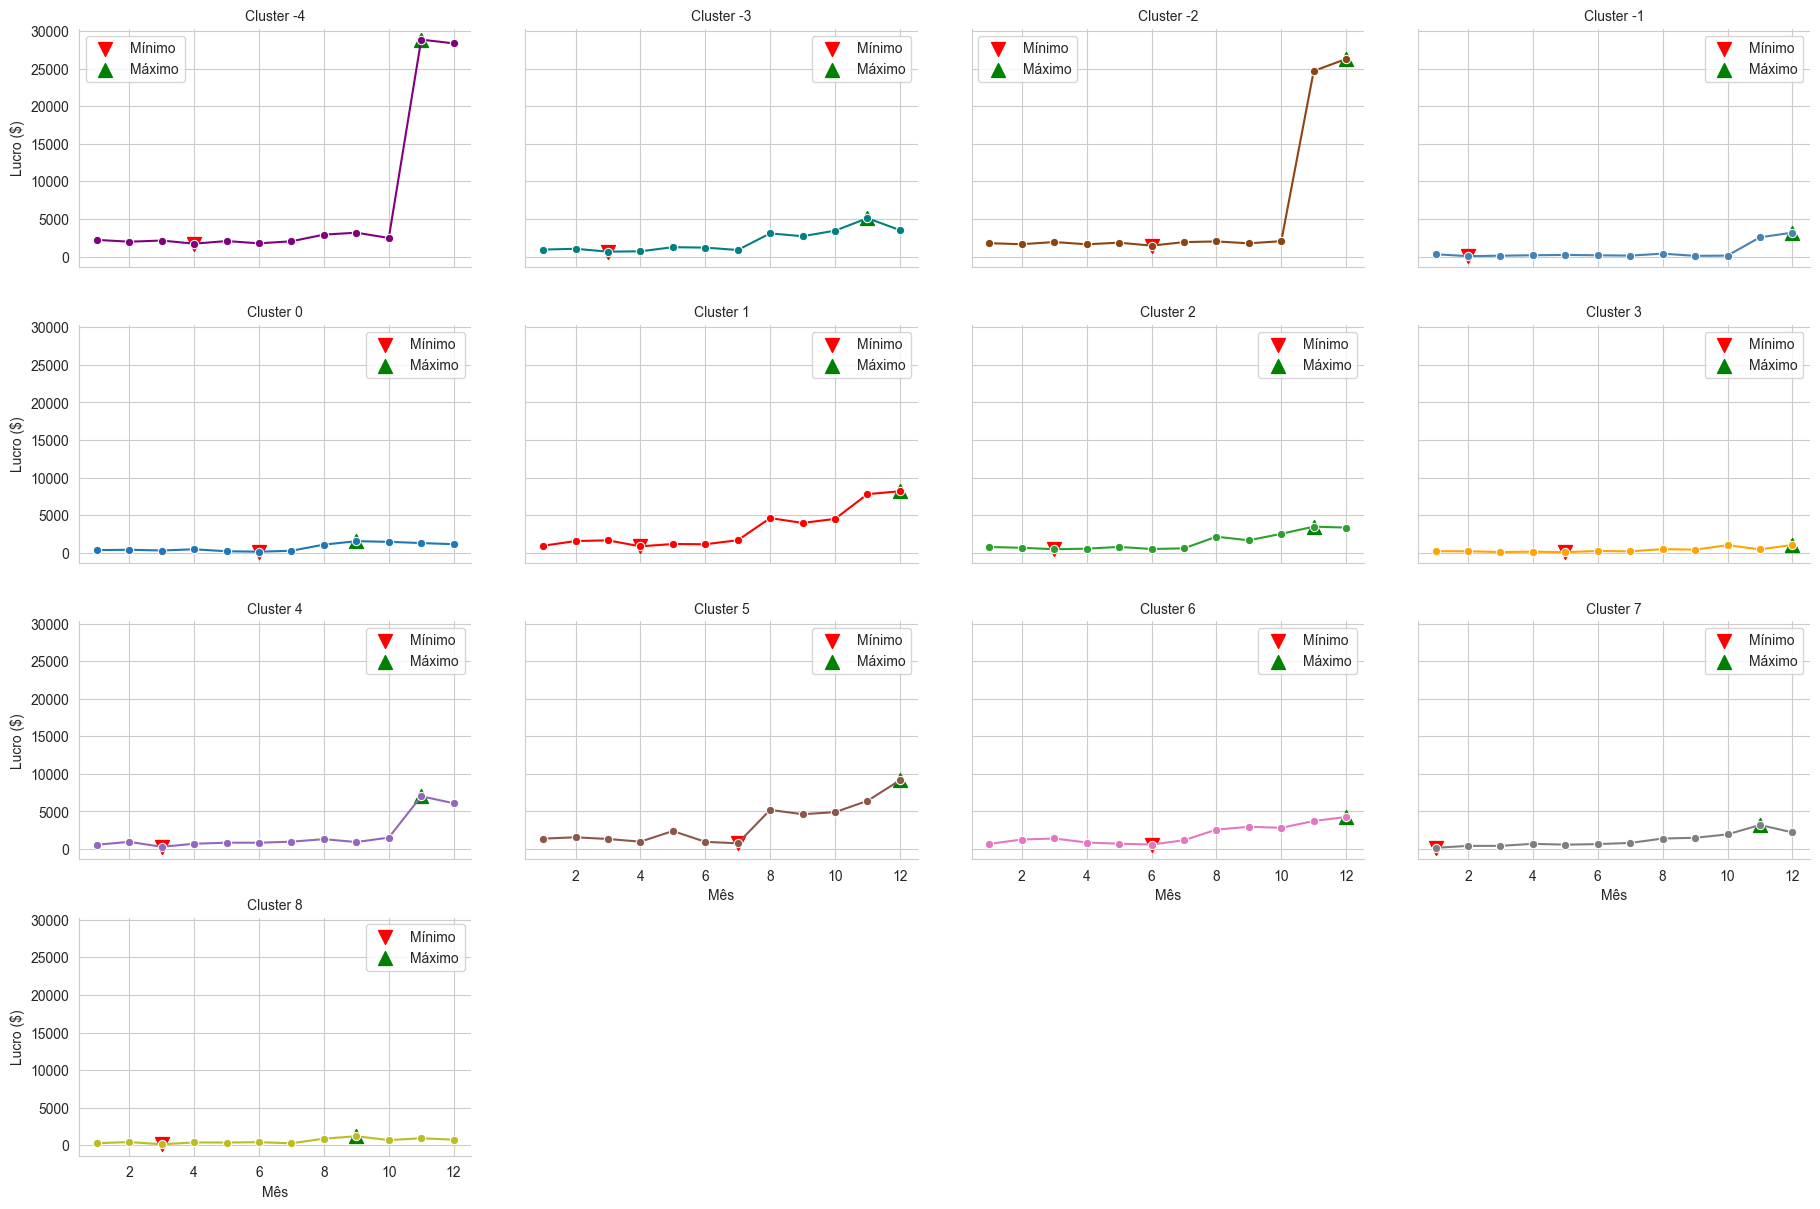

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo
sns.set_style("whitegrid")

# Encontrar os pontos mínimos e máximos de cada cluster
min_points = profit_by_month_cluster.loc[profit_by_month_cluster.groupby("cluster")["total_profit"].idxmin()]
max_points = profit_by_month_cluster.loc[profit_by_month_cluster.groupby("cluster")["total_profit"].idxmax()]

# Criar Faceted Grid para múltiplos gráficos de linha
g = sns.FacetGrid(profit_by_month_cluster, col="cluster", col_wrap=4, sharey=True, height=3, aspect=1.5)

# Adicionar gráficos de linha individuais para cada cluster com cores correspondentes
for ax, (cluster, data) in zip(g.axes.flatten(), profit_by_month_cluster.groupby("cluster")):
    color = cluster_colors[cluster]  # Cor do cluster
    
    # Plotar a linha do cluster
    sns.lineplot(ax=ax, data=data, x="month", y="total_profit", marker="o", color=color)
    
    # Destacar o ponto mínimo
    min_row = min_points[min_points["cluster"] == cluster]
    if not min_row.empty:
        ax.scatter(min_row["month"], min_row["total_profit"], color="red", s=100, marker="v", label="Mínimo")

    # Destacar o ponto máximo
    max_row = max_points[max_points["cluster"] == cluster]
    if not max_row.empty:
        ax.scatter(max_row["month"], max_row["total_profit"], color="green", s=100, marker="^", label="Máximo")

    ax.legend()  # Adicionar legenda para os pontos mínimos e máximos

# Ajustar rótulos e título
g.set_titles(col_template="Cluster {col_name}")
g.set_axis_labels("Mês", "Lucro ($)")
g.set_xticks(range(1, 13))
g.fig.suptitle("Lucro Mensal por Cluster", fontsize=14, y=1.02)

plt.show()


### 1. Criar o df agregado com os 12 clusters (aggregated_df_12clusters):

In [142]:
# Suponha que df_combined_merge seja seu DataFrame original
aggregated_df_12clusters = df_combined_merge.groupby(by="branch", as_index=False).agg(
    monetary_value=("total_profit", "sum"),
    frequency=("invoice_id", "nunique"),
    last_invoice_date=("date", "max")
)

# Corrigir max_invoice_date2 adicionando 1 dia extra
max_invoice_date2 = aggregated_df_12clusters["last_invoice_date"].max()  + pd.Timedelta(days=1)

# Recalcular recency
aggregated_df_12clusters["recency"] = (max_invoice_date2 - aggregated_df_12clusters["last_invoice_date"]).dt.days

cols_to_transform = ["monetary_value", "frequency", "recency"]
zero_counts = (aggregated_df_12clusters[cols_to_transform] == 0).sum()
print("Contagem de valores zero em cada coluna:\n", zero_counts)

rows_with_zeros = aggregated_df_12clusters[aggregated_df_12clusters[cols_to_transform].eq(0).any(axis=1)]
print("\nLinhas que contêm pelo menos um valor zero:\n", rows_with_zeros)



Contagem de valores zero em cada coluna:
 monetary_value    0
frequency         0
recency           0
dtype: int64

Linhas que contêm pelo menos um valor zero:
 Empty DataFrame
Columns: [branch, monetary_value, frequency, last_invoice_date, recency]
Index: []


In [143]:
aggregated_df_12clusters.head(10)

branch  monetary_value  frequency last_invoice_date  recency
0  WALM001         2359.44         64        2023-12-24        8
1  WALM002         2006.28         55        2023-12-23        9
2  WALM003         8472.00        170        2023-12-27        5
3  WALM004         2726.40         53        2023-12-29        3
4  WALM005         3396.96         71        2023-11-20       42
5  WALM006         3142.08         66        2023-12-29        3
6  WALM007         2997.60         59        2023-12-26        6
7  WALM008         3279.84         61        2023-12-31        1
8  WALM009        10692.00        224        2023-12-31        1
9  WALM010         2874.24         58        2023-12-02       30

In [144]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day', 'total_profit', 'year'],
      dtype='object')

In [145]:
df_combined_merge.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day', 'total_profit', 'year',
       'cluster'],
      dtype='object')

In [146]:

# Adicionar a coluna 'city' de df_combined_merge para aggregated_df_12clusters
aggregated_df_12clusters = pd.merge(aggregated_df_12clusters, df_combined_merge[['branch', 'city']].drop_duplicates(), on='branch', how='left')
aggregated_df_12clusters.head(10)

branch  monetary_value  frequency last_invoice_date  recency  \
0  WALM001         2359.44         64        2023-12-24        8   
1  WALM002         2006.28         55        2023-12-23        9   
2  WALM003         8472.00        170        2023-12-27        5   
3  WALM004         2726.40         53        2023-12-29        3   
4  WALM005         3396.96         71        2023-11-20       42   
5  WALM006         3142.08         66        2023-12-29        3   
6  WALM007         2997.60         59        2023-12-26        6   
7  WALM008         3279.84         61        2023-12-31        1   
8  WALM009        10692.00        224        2023-12-31        1   
9  WALM010         2874.24         58        2023-12-02       30   

             city  
0         Houston  
1          Dallas  
2     San Antonio  
3          Austin  
4      Fort Worth  
5         El Paso  
6       Arlington  
7  Corpus Christi  
8           Plano  
9          Laredo

In [147]:
aggregated_df_12clusters.columns

Index(['branch', 'monetary_value', 'frequency', 'last_invoice_date', 'recency',
       'city'],
      dtype='object')

In [148]:
df_combined_merge.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total',
       'ano', 'day_of_week', 'month', 'period_of_day', 'total_profit', 'year',
       'cluster'],
      dtype='object')

In [149]:
# Fazer o merge corretamente e substituir a coluna 'cluster'
aggregated_df_12clusters = aggregated_df_12clusters.drop(columns=["cluster"], errors="ignore").merge(
    df_combined_merge[['branch', 'cluster']].drop_duplicates(),
    on='branch',
    how='left'  # Mantém todas as linhas de aggregated_df_12clusters
)

# Exibir as primeiras linhas para conferir
aggregated_df_12clusters.head(10)


branch  monetary_value  frequency last_invoice_date  recency  \
0  WALM001         2359.44         64        2023-12-24        8   
1  WALM002         2006.28         55        2023-12-23        9   
2  WALM003         8472.00        170        2023-12-27        5   
3  WALM004         2726.40         53        2023-12-29        3   
4  WALM005         3396.96         71        2023-11-20       42   
5  WALM006         3142.08         66        2023-12-29        3   
6  WALM007         2997.60         59        2023-12-26        6   
7  WALM008         3279.84         61        2023-12-31        1   
8  WALM009        10692.00        224        2023-12-31        1   
9  WALM010         2874.24         58        2023-12-02       30   

             city  cluster  
0         Houston        5  
1          Dallas        2  
2     San Antonio       -4  
3          Austin        8  
4      Fort Worth       -3  
5         El Paso        1  
6       Arlington        5  
7  Corpus Christi        7  
8           Plano       -4  
9          Laredo       -3

In [150]:
# Filtrar branches que ficaram sem cluster (NaN)
branches_sem_cluster = aggregated_df_12clusters[aggregated_df_12clusters["cluster"].isna()]

# Exibir o número de branches sem cluster
print(f"Número de branches sem cluster: {branches_sem_cluster.shape[0]}")

# Exibir as branches que não têm cluster atribuído
if not branches_sem_cluster.empty:
    print("Branches sem cluster atribuído:")
    print(branches_sem_cluster[["branch", "city"]])

Número de branches sem cluster: 0


### 2. Análise dos clusters

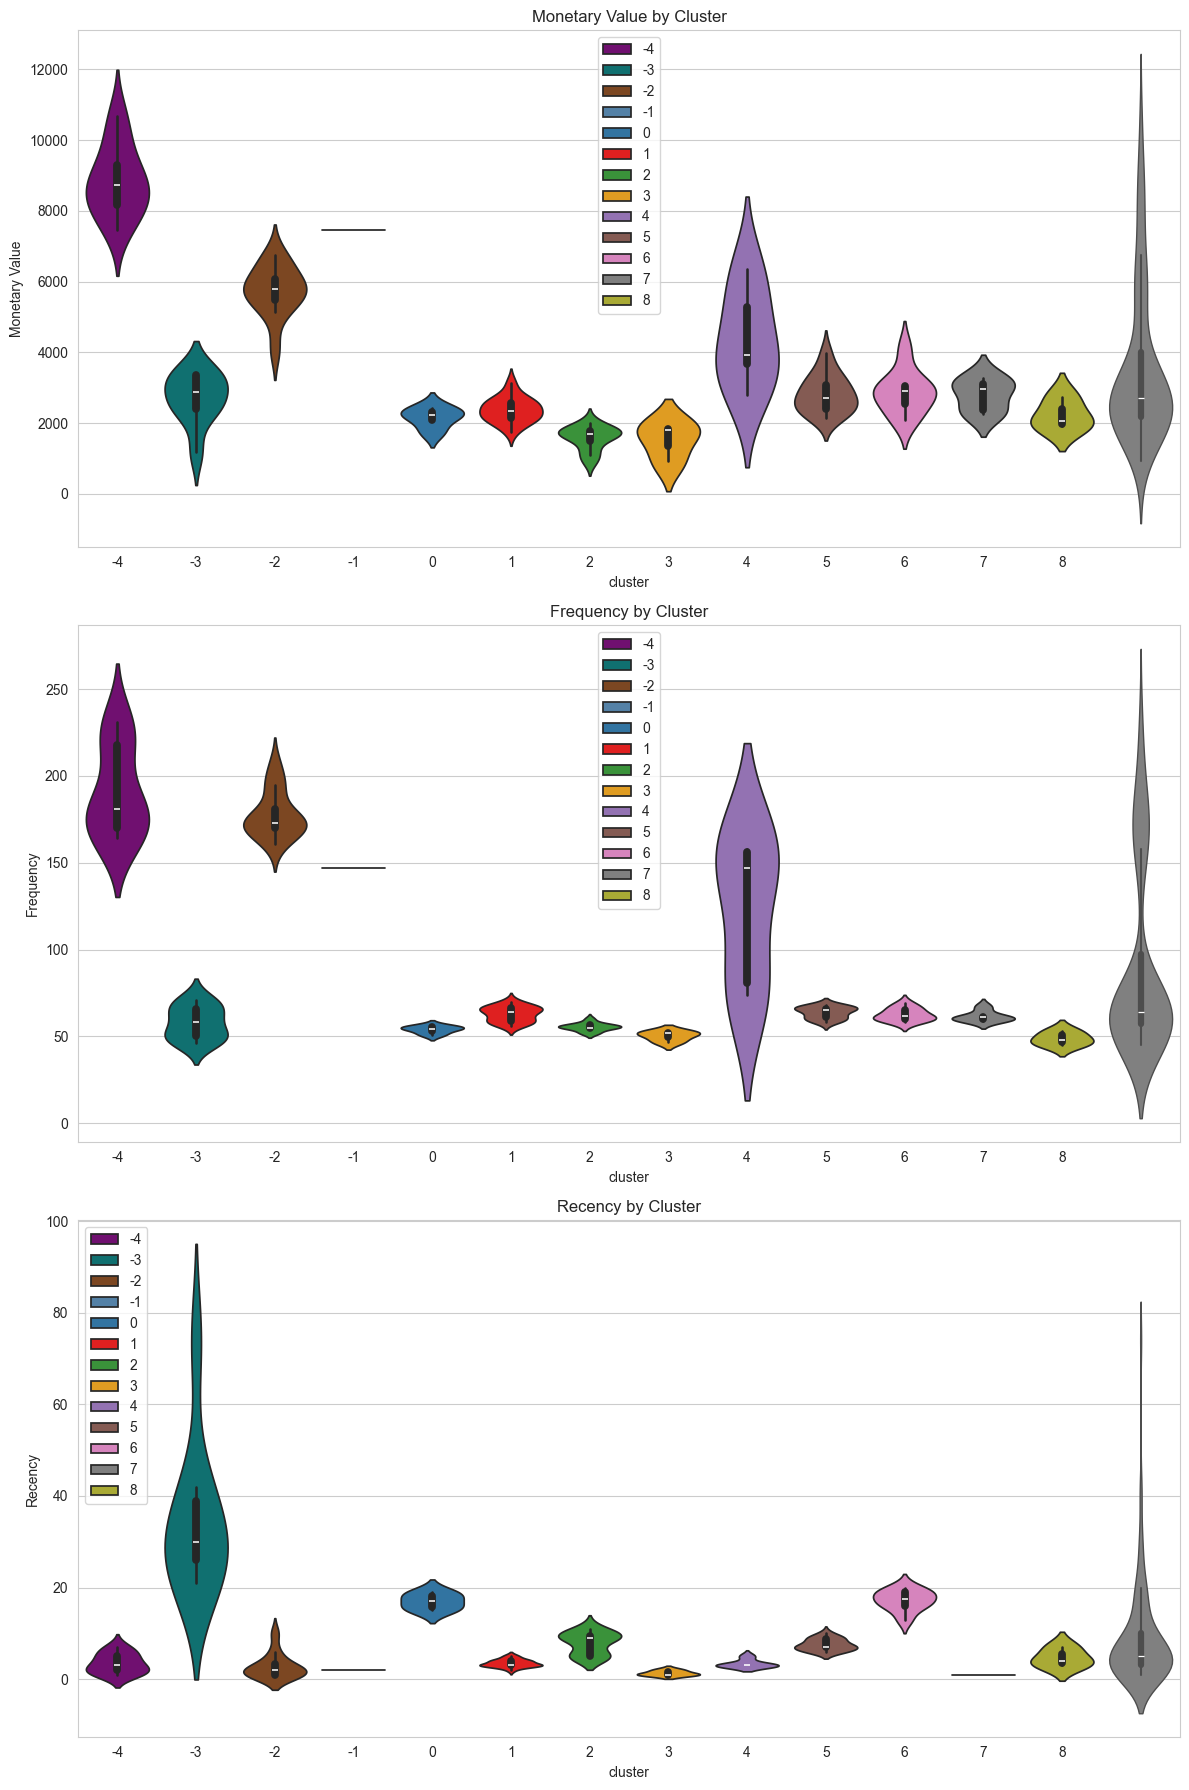

In [151]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=aggregated_df_12clusters['cluster'], y=aggregated_df_12clusters['monetary_value'], palette=cluster_colors, hue=aggregated_df_12clusters["cluster"])
sns.violinplot(y=aggregated_df_12clusters['monetary_value'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=aggregated_df_12clusters['cluster'], y=aggregated_df_12clusters['frequency'], palette=cluster_colors, hue=aggregated_df_12clusters["cluster"])
sns.violinplot(y=aggregated_df_12clusters['frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=aggregated_df_12clusters['cluster'], y=aggregated_df_12clusters['recency'], palette=cluster_colors, hue=aggregated_df_12clusters["cluster"])
sns.violinplot(y=aggregated_df_12clusters['recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

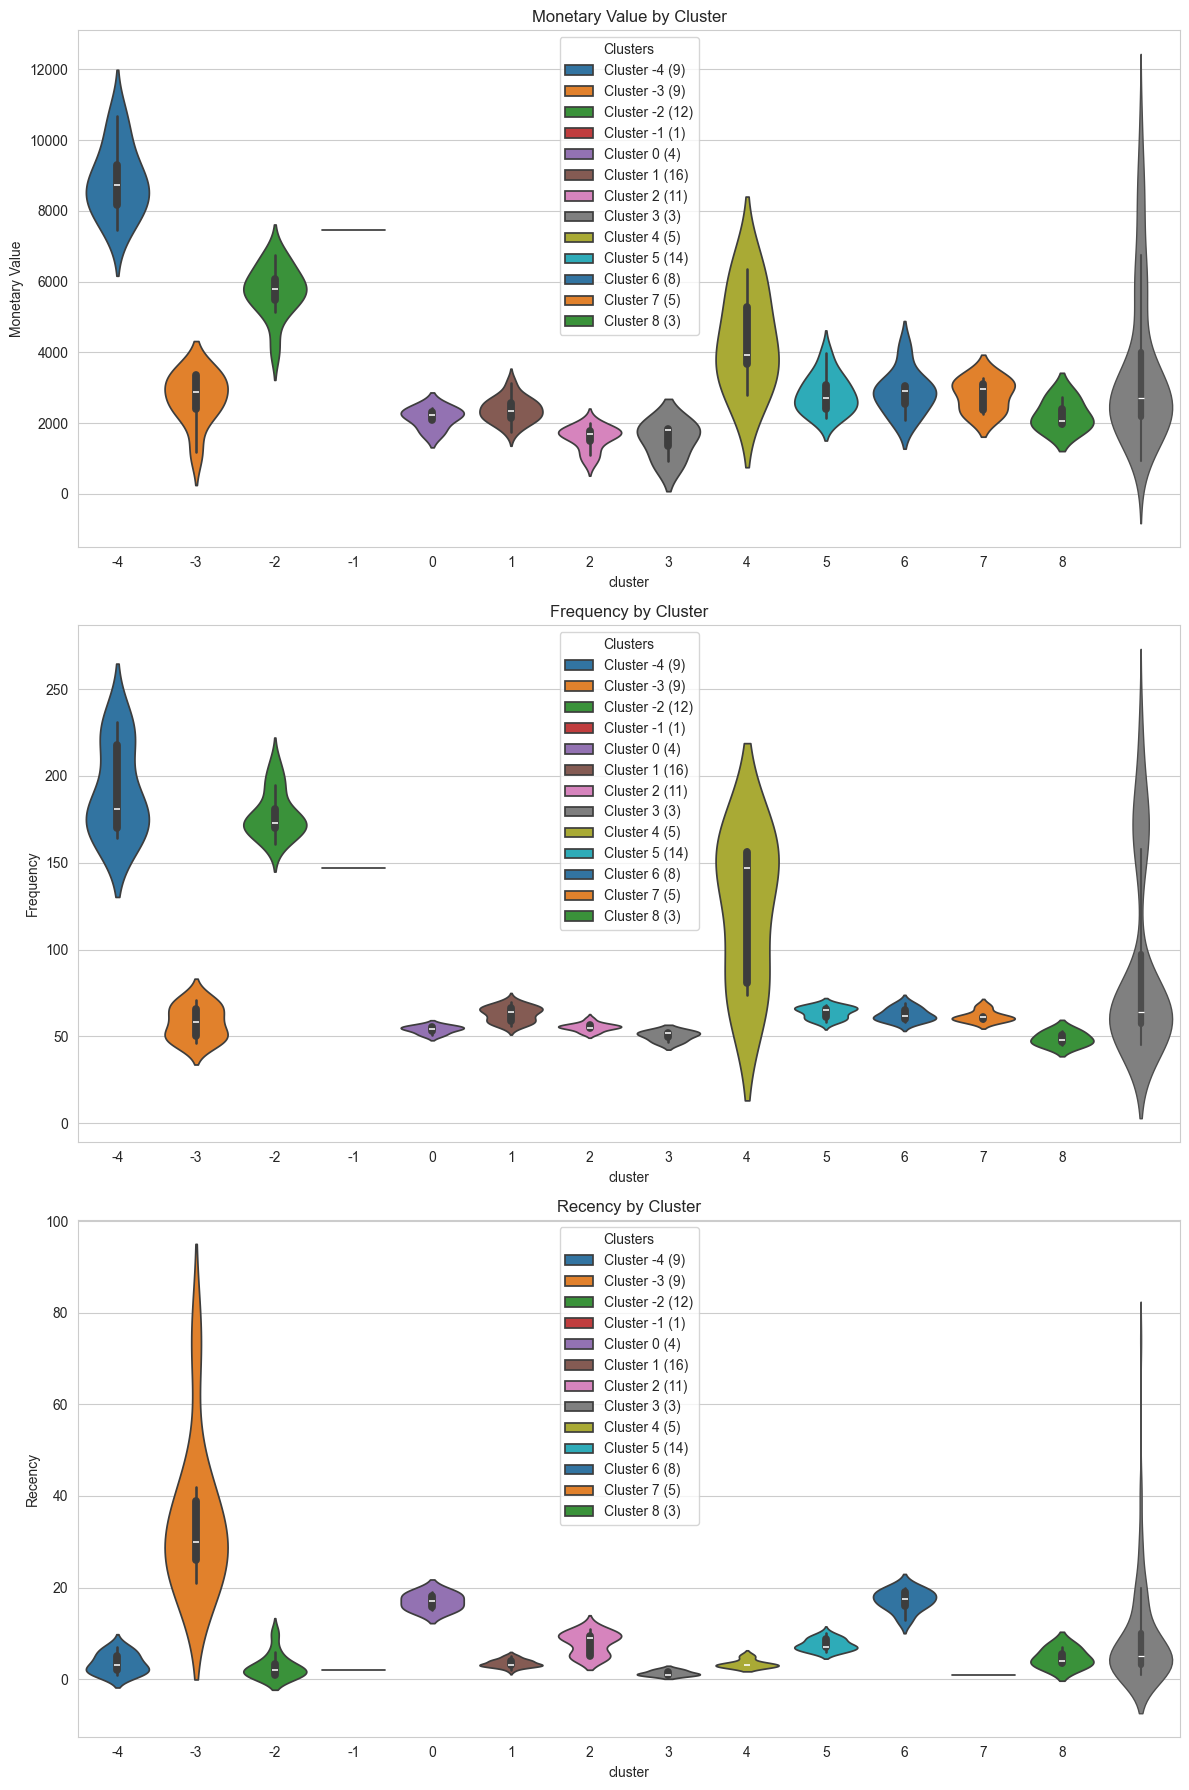

In [152]:
# Definir cores para cada cluster
cluster_colors = sns.color_palette("tab10", n_colors=13)

# Contar o número de branches em cada cluster
cluster_counts = aggregated_df_12clusters['cluster'].value_counts().sort_index()

# Criar legendas customizadas no formato "Cluster X (N branches)"
legend_labels = [f"Cluster {c} ({cluster_counts[c]})" for c in cluster_counts.index]

plt.figure(figsize=(12, 18))

# Plot 1 - Monetary Value
plt.subplot(3, 1, 1)
ax1 = sns.violinplot(x=aggregated_df_12clusters['cluster'], y=aggregated_df_12clusters['monetary_value'], 
                     palette=cluster_colors, hue=aggregated_df_12clusters["cluster"])
sns.violinplot(y=aggregated_df_12clusters['monetary_value'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Ajustar a legenda do primeiro gráfico
handles, _ = ax1.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Clusters", loc="upper center")

# Plot 2 - Frequency
plt.subplot(3, 1, 2)
ax2 = sns.violinplot(x=aggregated_df_12clusters['cluster'], y=aggregated_df_12clusters['frequency'], 
                     palette=cluster_colors, hue=aggregated_df_12clusters["cluster"])
sns.violinplot(y=aggregated_df_12clusters['frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Ajustar a legenda do segundo gráfico
handles, _ = ax2.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Clusters", loc="upper center")

# Plot 3 - Recency
plt.subplot(3, 1, 3)
ax3 = sns.violinplot(x=aggregated_df_12clusters['cluster'], y=aggregated_df_12clusters['recency'], 
                     palette=cluster_colors, hue=aggregated_df_12clusters["cluster"])
sns.violinplot(y=aggregated_df_12clusters['recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

# Ajustar a legenda do terceiro gráfico
handles, _ = ax3.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Clusters", loc="upper center")

plt.tight_layout()
plt.show()


C:\Users\Thomas Barbosa\AppData\Local\Temp\ipykernel_18740\1627873534.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bottom_months = monthly_sales.groupby('cluster').apply(


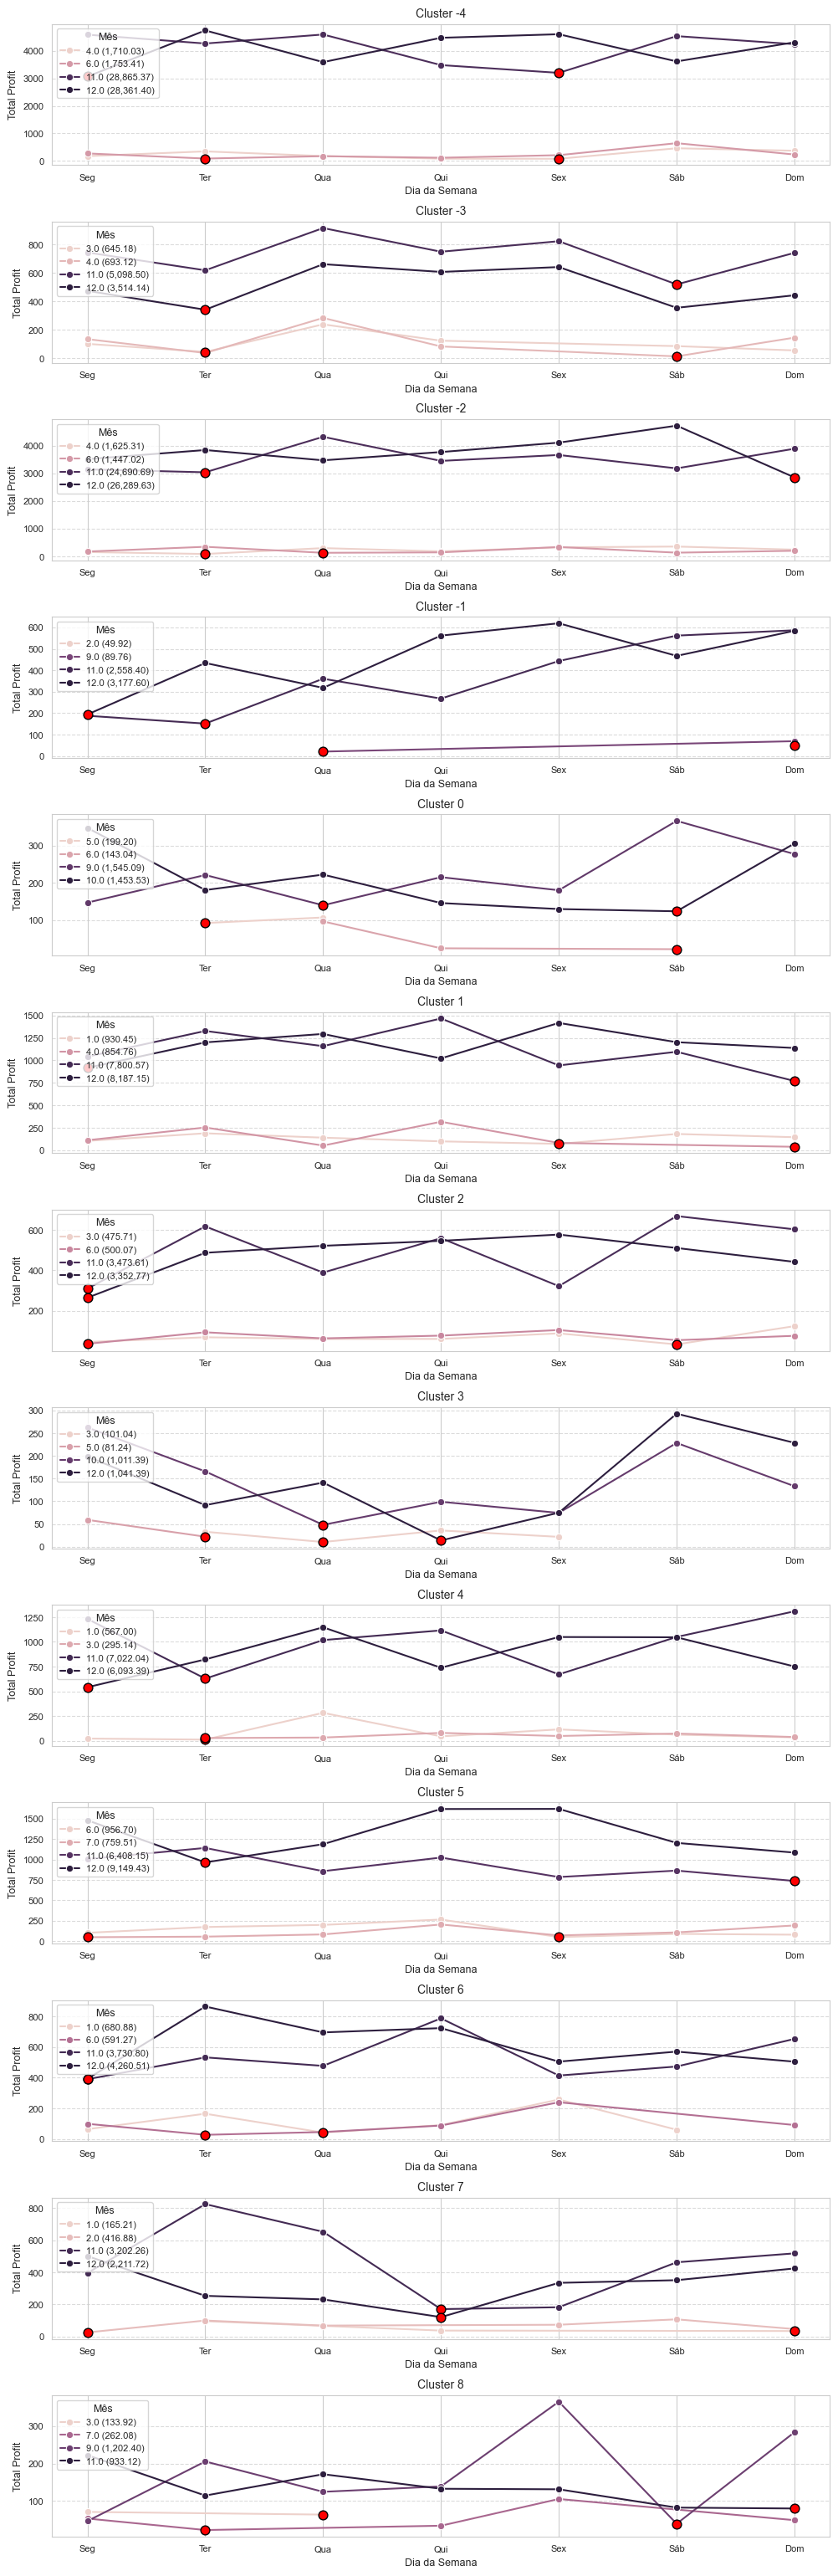

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar os dados para calcular o total de vendas (total_profit) por mês e cluster
monthly_sales = df_combined_merge.groupby(['cluster', 'month'])['total_profit'].sum().reset_index()

# Identificar os 2 melhores e os 2 piores meses de venda para cada cluster
top_bottom_months = monthly_sales.groupby('cluster').apply(
    lambda x: pd.concat([x.nlargest(2, 'total_profit'), x.nsmallest(2, 'total_profit')])
).reset_index(drop=True)

# Filtrar os dados originais para manter apenas os meses selecionados
filtered_df = df_combined_merge.merge(top_bottom_months[['cluster', 'month']], on=['cluster', 'month'])

# Agrupar por day_of_week, cluster e month para analisar a variação ao longo da semana
weekly_trends = filtered_df.groupby(['cluster', 'month', 'day_of_week'])['total_profit'].sum().reset_index()

# Obter a lista única de clusters
unique_clusters = weekly_trends['cluster'].unique()

# Criar subplots com tamanho menor para melhor visualização
fig, axes = plt.subplots(nrows=len(unique_clusters), ncols=1, figsize=(12, 3 * len(unique_clusters)))

# Se houver apenas um cluster, transformar em lista para evitar erro de indexação
if len(unique_clusters) == 1:
    axes = [axes]

# Criar um gráfico para cada cluster
for i, cluster in enumerate(unique_clusters):
    ax = axes[i]
    cluster_data = weekly_trends[weekly_trends['cluster'] == cluster]
    
    # Encontrar os 2 meses com menor e maior total_profit para modificar a legenda
    min_months = monthly_sales[monthly_sales['cluster'] == cluster].nsmallest(2, 'total_profit')
    max_months = monthly_sales[monthly_sales['cluster'] == cluster].nlargest(2, 'total_profit')

    # Criar dicionário para atualizar a legenda com os valores reais
    formatted_months = {}
    for _, row in pd.concat([min_months, max_months]).iterrows():
        formatted_months[row['month']] = f"{row['month']} ({row['total_profit']:,.2f})"

    # Criar o gráfico com a legenda ajustada
    lines = sns.lineplot(
        data=cluster_data, x='day_of_week', y='total_profit', hue='month', marker='o', ax=ax
    )

    # Atualizar os rótulos da legenda com os valores dos meses de maior e menor total_profit
    handles, labels = ax.get_legend_handles_labels()
    updated_labels = [formatted_months.get(int(lbl), lbl) for lbl in labels]
    ax.legend(handles, updated_labels, title="Mês", fontsize=8, title_fontsize=9, loc="upper left")

    # Marcar os pontos mínimos de cada linha
    for month in cluster_data['month'].unique():
        month_data = cluster_data[cluster_data['month'] == month]
        min_idx = month_data['total_profit'].idxmin()
        min_x = month_data.loc[min_idx, 'day_of_week']
        min_y = month_data.loc[min_idx, 'total_profit']
        
        # Marcar ponto mínimo com um símbolo
        ax.scatter(min_x, min_y, color='red', s=60, edgecolor='black', zorder=3)

    ax.set_title(f"Cluster {cluster}", fontsize=10)
    ax.set_xlabel("Dia da Semana", fontsize=9)
    ax.set_ylabel("Total Profit", fontsize=9)
    ax.set_xticks(range(0, 7))
    ax.set_xticklabels(["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"], fontsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.4)

# Exibir os gráficos
plt.show()


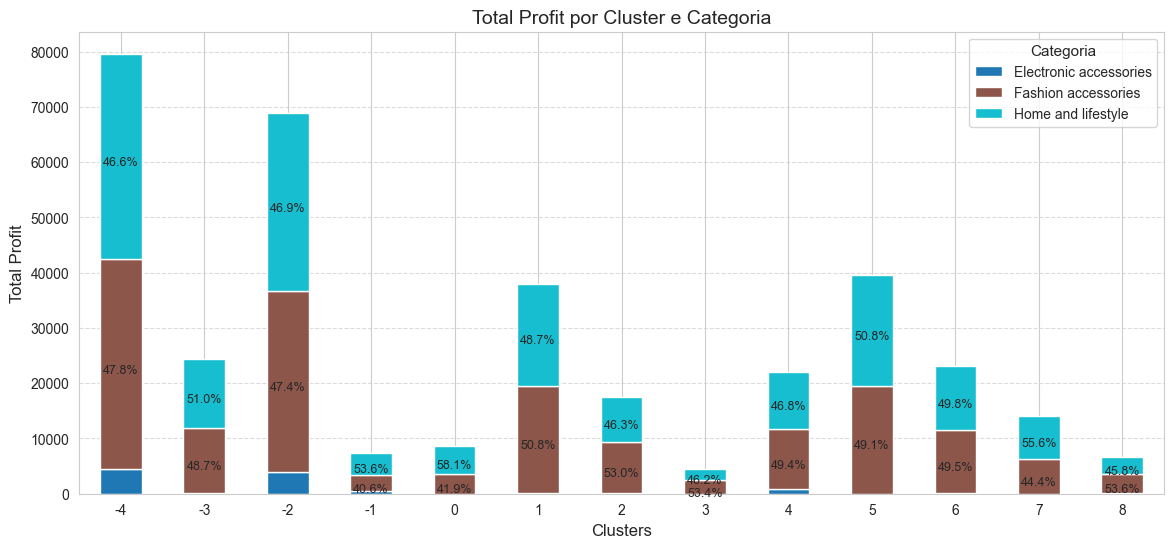

In [154]:
# Agrupar os dados somando 'total_profit' por cluster e categoria
stacked_data = df_combined_merge.groupby(['cluster', 'category'])['total_profit'].sum().unstack()

# Calcular as porcentagens de cada categoria dentro do cluster
stacked_percent = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 6))
bars = stacked_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Adicionar rótulos de porcentagem em cada barra
for i, container in enumerate(bars.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Evitar exibir 0%
            x = bar.get_x() + bar.get_width() / 2  # Posição central da barra
            y = bar.get_y() + height / 2  # Posição no meio da barra
            cluster_index = int(bar.get_x() + 0.5)  # Encontrar índice do cluster
            category_percent = stacked_percent.iloc[cluster_index, i]  # Obter percentual
            if category_percent >= 6:
                ax.text(x, y, f"{category_percent:.1f}%", ha='center', va='top', fontsize=9)

# Personalizar o gráfico
ax.set_title("Total Profit por Cluster e Categoria", fontsize=14)
ax.set_xlabel("Clusters", fontsize=12)
ax.set_ylabel("Total Profit", fontsize=12)
ax.legend(title="Categoria", fontsize=10, title_fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.xticks(rotation=0)
plt.show()


# Estratificação Analítica de Clusters: Insights Operacionais


## Explicação dos Cluster's

### Cluster -4: WOW-Mart (Champions)

##### Perfil Estratégico
- **Característica**: Clientes de altíssimo valor e engajamento máximo
- **Objetivo**: Maximização do Lifetime Value e retenção estratégica

##### Intervenções Táticas
- Programa VIP exclusivo com arquitetura de benefícios progressivos
- Modelo de atendimento concierge com priorização absoluta
- Estratégia de aquisição lookalike para replicação de perfil de alto valor
- Mecanismo de reconhecimento e influência personalizado

### Cluster -3: Lovers (Clientes Leais em Risco)
#### Perfil Estratégico
- **Característica**: Clientes fiéis com potencial iminente de churn
- **Objetivo**: Mitigação de risco e reativação preventiva

#### Intervenções Táticas
- Engajamento omnichannel com hiperpersonalização
- Diagnóstico preditivo de barreiras comportamentais
- Pacote de reconexão com incentivos contextuais
- Mapeamento de pontos de atrito na jornada do cliente

### Cluster -2: Loyal (Compradores Frequentes)
#### Perfil Estratégico
- **Característica**: Alta frequência de compra com potencial de crescimento
- **Objetivo**: Expansão do ticket médio e fidelização progressiva

#### Intervenções Táticas
- Programa de fidelidade com gamificação inteligente
- Sistema de indicação com recompensas exponenciais
- Recomendação hiperpersonalizada via machine learning
- Upsell preditivo com base em comportamento histórico

### Cluster -1: Filial Única (Laboratório de Inovação)
#### Perfil Estratégico
- **Característica**: Unidade experimental para validação estratégica
- **Objetivo**: Transformação contínua e otimização operacional

#### Intervenções Táticas
- Comitê dedicado para análise estratégica
- Dashboard de monitoramento em granularidade máxima
- Ambiente de experimentação com prototipagem ágil
- Mecanismo de feedback em ciclo fechado
- Sandbox de inovação comercial

### Cluster 0: Promising (Compradores Moderados)
#### Perfil Estratégico
- **Característica**: Compradores recorrentes com potencial latente
- **Objetivo**: Incremento de LTV e frequência de compra

#### Intervenções Táticas
- Desafios gamificados de engajamento
- Calculadora de economia comportamental
- Programa de pontos com progressão motivacional
- Conteúdo educativo de otimização de compras

### Cluster 1: New Passions (Compradores Recentes)
#### Perfil Estratégico
- **Característica**: Clientes novos com alto potencial de conversão
- **Objetivo**: Consolidação da primeira experiência e indução da segunda compra

#### Intervenções Táticas
- Onboarding estruturado multicanal
- Voucher estratégico para conversão
- Pesquisa pós-compra para refinamento experiencial

### Cluster 2: Flirting (Compradores Ocasionais)
#### Perfil Estratégico
- **Característica**: Compradores esporádicos com histórico positivo
- **Objetivo**: Aumento de frequência e reativação contextual

#### Intervenções Táticas
- Calendário inteligente de compras
- Alertas preditivos personalizados
- Recomendações baseadas em comportamento histórico

### Cluster 3: Break-Ups (Compradores Econômicos)
#### Perfil Estratégico
- **Característica**: Clientes sensíveis a custo-benefício
- **Objetivo**: Manutenção da recorrência via estímulos financeiros

#### Intervenções Táticas
- Bundles progressivos de valor
- Comparativo econômico personalizado
- Programa de pontos otimizado para retenção

### Cluster 4: Don Juan (Compradores Esporádicos de Valor)
#### Perfil Estratégico
- **Característica**: Alto ticket com baixa recorrência
- **Objetivo**: Estímulo à frequência e conversão sustentável

#### Intervenções Táticas
- Consultoria personalizada de compra
- Conteúdo premium de engajamento
- Incentivos escaláveis para incremento de frequência

### Cluster 5: Potenciais Crescentes
#### Perfil Estratégico
- **Característica**: Volume moderado com potencial latente
- **Objetivo**: Conversão em clientes de alto valor

#### Intervenções Táticas
- Recompensas progressivas e escalonadas
- Personalização via machine learning
- Campanha de reativação estratégica
- Métricas de sucesso claramente definidas

### Cluster 6: About To Dump You
#### Perfil Estratégico
- **Característica**: Clientes em declínio acentuado
- **Objetivo**: Diagnóstico de churn e reativação

#### Intervenções Táticas
- Campanha de reengajamento multifásica
- Pesquisa de churn com oferta personalizada
- Comunicação adaptativa por canal preferido

### Cluster 7: Apprentice
#### Perfil Estratégico
- **Característica**: Novos compradores de baixo valor
- **Objetivo**: Educação e incentivo à recorrência

#### Intervenções Táticas
- Onboarding digital interativo
- Descontos progressivos
- Conteúdo educacional de compra

### Cluster 8: Potential Lovers
#### Perfil Estratégico
- **Característica**: Compradores frequentes de baixo ticket
- **Objetivo**: Elevação do valor médio do pedido

#### Intervenções Táticas
- Sistema de pontos com bônus estratégicos
- Bundles personalizados de maximização
- Amostras para incentivo de upsell

**Metodologia Transversal**: 
- Segmentação baseada em modelo RFM
- Abordagem preditiva e adaptativa
- Foco em personalização granular
- Métricas-chave: LTV, retenção, ticket médio

## Contrução do Mapa por Cluster

### 3. Geolocalização e Correção de Coordenadas:

In [155]:
df_combined_merge.head()

invoice_id   branch         city             category  unit_price  \
0        1001  WALM012      Garland   Home and lifestyle        55.0   
1        1002  WALM013       Irving  Fashion accessories        53.0   
2        1003  WALM090    Brownwood   Home and lifestyle        66.0   
3        1004  WALM031   Lewisville  Fashion accessories        36.0   
4        1005  WALM003  San Antonio   Home and lifestyle        50.0   

   quantity       date  time payment_method  rating  profit_margin  total  \
0       2.0 2022-10-09    15        Ewallet     6.0           0.48  110.0   
1       2.0 2020-04-06    10        Ewallet     8.0           0.48  106.0   
2       2.0 2020-08-04    13        Ewallet     7.0           0.33  132.0   
3       1.0 2022-10-18    19        Ewallet     7.0           0.48   36.0   
4       3.0 2023-10-30    19        Ewallet     7.0           0.36  150.0   

    ano  day_of_week  month period_of_day  total_profit  year  cluster  
0  2022            6     10         Tarde         52.80  2022        5  
1  2020            0      4         Manhã         50.88  2020        8  
2  2020            1      8         Tarde         43.56  2020        5  
3  2022            1     10         Noite         17.28  2022        3  
4  2023            0     10         Noite         54.00  2023       -4

In [156]:
# Inicializa o geolocalizador
geolocator = Nominatim(user_agent="meu_app_geolocalizacao")

# Função para obter latitude e longitude
def get_coordinates(city):
    try:
        location = geolocator.geocode(city, timeout=10)
        if location:
            return location.latitude, location.longitude
    except GeocoderTimedOut:
        print(f"Timeout ao buscar: {city}")
    return None, None

# Aplica a função corretamente e transforma em DataFrame
coords_df = aggregated_df_12clusters["city"].apply(lambda x: pd.Series(get_coordinates(x), index=["latitude", "longitude"]))

# Adiciona ao DataFrame original
aggregated_df_12clusters = pd.concat([aggregated_df_12clusters, coords_df], axis=1)

# Definição aproximada dos limites do Texas
LAT_MIN, LAT_MAX = 25.0, 36.5
LON_MIN, LON_MAX = -106.7, -93.5

# Filtrar as branches que estão FORA desses limites
filiais_fora_do_texas = aggregated_df_12clusters[
    (aggregated_df_12clusters["latitude"] < LAT_MIN) | 
    (aggregated_df_12clusters["latitude"] > LAT_MAX) | 
    (aggregated_df_12clusters["longitude"] < LON_MIN) | 
    (aggregated_df_12clusters["longitude"] > LON_MAX)
]

print("Branchs fora do Texas:")
print(filiais_fora_do_texas[["branch", "city", "latitude", "longitude"]])


Branchs fora do Texas:
     branch        city   latitude   longitude
17  WALM018      Frisco  37.779259 -122.419329
18  WALM019    Pasadena  34.147651 -118.144155
27  WALM028      Odessa  46.484302   30.732288
35  WALM036       Allen  40.807780  -84.057222
39  WALM040    Edinburg  55.953346   -3.188375
49  WALM050    Victoria -36.598610  144.678005
51  WALM052   Mansfield  40.758390  -82.515447
59  WALM060      DeSoto  27.190253  -81.824423
62  WALM063  Georgetown   6.813743  -58.162447
63  WALM064     Bedford  40.027145  -78.523745
71  WALM072   Lancaster  40.037996  -76.305671
75  WALM076  Huntsville  34.729847  -86.585901
85  WALM086   Rosenberg  49.081572   19.303417
87  WALM088    Cleburne  33.650696  -85.501736


In [157]:

correcao_coordenadas = {
    "Frisco": (33.150674, -96.823611),
    "Pasadena": (29.691062, -95.209100),
    "Odessa": (31.845682, -102.367645),
    "Allen": (33.103174, -96.670550),
    "Edinburg": (26.301737, -98.163343),
    "Victoria": (28.805267, -97.003598),
    "Mansfield": (32.563192, -97.141677),
    "DeSoto": (32.589699, -96.857073),
    "Georgetown": (30.633263, -97.678898),
    "Bedford": (32.844017, -97.143067),
    "Lancaster": (32.592079, -96.756108),
    "Huntsville": (30.723526, -95.550777),
    "Rosenberg": (29.557181, -95.808498),
    "Cleburne": (32.347643, -97.386683)
}

# Aplicar correção manual
for city, (lat, lon) in correcao_coordenadas.items():
    aggregated_df_12clusters.loc[aggregated_df_12clusters["city"] == city, ["latitude", "longitude"]] = lat, lon

# Exibir as filiais corrigidas
mask = aggregated_df_12clusters["city"].isin(correcao_coordenadas.keys())
print(aggregated_df_12clusters.loc[mask, ["branch", "city", "latitude", "longitude"]])

     branch        city   latitude   longitude
17  WALM018      Frisco  33.150674  -96.823611
18  WALM019    Pasadena  29.691062  -95.209100
27  WALM028      Odessa  31.845682 -102.367645
35  WALM036       Allen  33.103174  -96.670550
39  WALM040    Edinburg  26.301737  -98.163343
49  WALM050    Victoria  28.805267  -97.003598
51  WALM052   Mansfield  32.563192  -97.141677
59  WALM060      DeSoto  32.589699  -96.857073
62  WALM063  Georgetown  30.633263  -97.678898
63  WALM064     Bedford  32.844017  -97.143067
71  WALM072   Lancaster  32.592079  -96.756108
75  WALM076  Huntsville  30.723526  -95.550777
85  WALM086   Rosenberg  29.557181  -95.808498
87  WALM088    Cleburne  32.347643  -97.386683


In [158]:
aggregated_df_12clusters.head(10)

branch  monetary_value  frequency last_invoice_date  recency  \
0  WALM001         2359.44         64        2023-12-24        8   
1  WALM002         2006.28         55        2023-12-23        9   
2  WALM003         8472.00        170        2023-12-27        5   
3  WALM004         2726.40         53        2023-12-29        3   
4  WALM005         3396.96         71        2023-11-20       42   
5  WALM006         3142.08         66        2023-12-29        3   
6  WALM007         2997.60         59        2023-12-26        6   
7  WALM008         3279.84         61        2023-12-31        1   
8  WALM009        10692.00        224        2023-12-31        1   
9  WALM010         2874.24         58        2023-12-02       30   

             city  cluster   latitude   longitude  
0         Houston        5  29.758938  -95.367697  
1          Dallas        2  32.776272  -96.796856  
2     San Antonio       -4  29.424600  -98.495141  
3          Austin        8  30.271129  -97.743700  
4      Fort Worth       -3  32.753177  -97.332746  
5         El Paso        1  31.760116 -106.487040  
6       Arlington        5  32.735582  -97.107119  
7  Corpus Christi        7  27.763530  -97.403319  
8           Plano       -4  33.013676  -96.692510  
9          Laredo       -3  27.507500  -99.506992

### 4. Criar Mapa com os 12 Clusters:

In [161]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

def create_enhanced_map_with_icons(aggregated_df_12clusters):
    # Certificar que os clusters são numéricos
    aggregated_df_12clusters["cluster"] = pd.to_numeric(aggregated_df_12clusters["cluster"], errors='coerce')

    # Criar um mapa centralizado na média das coordenadas coletadas
    mapa = folium.Map(
        location=[aggregated_df_12clusters["latitude"].mean(), aggregated_df_12clusters["longitude"].mean()],
        zoom_start=2,
        zoom_control=True,
        control_scale=True
    )

    # Dicionário de nomes para os clusters
    cluster_names = {
        -4: "WOW-MART (Campeões)",
        -3: "Clientes Leais em Risco",
        -2: "Compradores Frequentes", 
        -1: "Laboratório de Inovação",
        0: "Compradores Moderados",
        1: "Compradores Recentes",
        2: "Compradores Ocasionais",
        3: "Compradores Econômicos",
        4: "Compradores Esporádicos de Valor",
        5: "Expansão de Valor",
        6: "Compradores em Declínio",
        7: "Novos Compradores de Baixo Valor",
        8: "Compradores Frequentes de Baixo Valor"
    }

    # Definição de cores para cada cluster (adicione as cores desejadas)
    cluster_colors = {
        -4: "blue", -3: "red", -2: "green", -1: "purple", 
        0: "orange", 1: "pink", 2: "yellow", 3: "brown",
        4: "cyan", 5: "magenta", 6: "gray", 7: "lime", 8: "navy"
    }

    # Corrigir contagem de branches por cluster
    cluster_counts = (
        aggregated_df_12clusters
        .drop_duplicates(subset=['branch'])
        .groupby("cluster")["branch"]
        .count()
        .reindex(cluster_colors.keys(), fill_value=0)
    )

    # Criar um agrupador de marcadores para facilitar visualização
    marker_cluster = MarkerCluster().add_to(mapa)

    # Adicionar pontos ao mapa com círculos coloridos
    for _, row in aggregated_df_12clusters.iterrows():
        if pd.notnull(row["latitude"]) and pd.notnull(row["longitude"]):
            cluster_color = cluster_colors.get(row["cluster"], "gray")  # Cor padrão se o cluster não for encontrado
            cluster_name = cluster_names.get(row["cluster"], f"Cluster {row['cluster']}")

            folium.CircleMarker(
                location=[row["latitude"], row["longitude"]],
                radius=5,  # Ajuste o raio conforme necessário
                color=cluster_color,
                fill=True,
                fill_color=cluster_color,
                fill_opacity=0.7,
                popup=f"Filial: {row['branch']}<br>Cidade: {row['city']}<br>Cluster: {row['cluster']} - {cluster_name}"
            ).add_to(marker_cluster)

    # Criar a legenda com cores, números, nomes e contagem de branches
    legend_html = """
        <div style="
            position: fixed;
            bottom: 50px; left: 50px; width: 360px; height: auto;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px; opacity: 0.9;
            box-shadow: 2px 2px 8px rgba(0,0,0,0.3);
            border-radius: 8px;
        ">
            <b>Legenda - Clusters</b><br><br>
    """

    for cluster, color in cluster_colors.items():
        cluster_name = cluster_names.get(cluster, f"Cluster {cluster}")
        branch_count = cluster_counts.get(cluster, 0)
        legend_html += f"""
            <div style="display: flex; align-items: center; margin-bottom: 5px;">
                <i class="fa fa-circle" style="color: {color}; margin-right: 10px;"></i>
                <b>{cluster} - {cluster_name} ({branch_count})</b>
            </div>
        """

    legend_html += "</div>"

    # Adicionar legenda ao mapa
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Salvar e imprimir caminho do arquivo
    output_file = "mapa_filiais_FINAL_12_clusters.html"
    mapa.save(output_file)
    print(f"Mapa salvo em: {output_file}")

    return mapa
    
mapa = create_enhanced_map_with_icons(aggregated_df_12clusters)
mapa


Mapa salvo em: mapa_filiais_FINAL_12_clusters.html
